In [1]:
#importing important libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
ic=pd.read_csv('auto_insurance_claim.csv')
ic.head(7)

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   
5  OC83172      US         IA      Iowa    825.629780      Yes     Basic   
6  XZ87318      US         IA      Iowa    538.089864      Yes     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor           2/24/11         Employed  ...   
1  Bachelor           1/31/11       Unemployed  ...   
2  Bachelor           2/19/11         Employed  ...   
3  Bachelor           1/20/11       Unemployed  ...   
4  Bachelor            2/3/11         Employed  ...   
5  Bachelor           1/25/11         Employed  ...   
6   College           2/24/11         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                          0                  8   
2                            38                          0                  2   
3                            65                          0                  7   
4                            44                          0                  1   
5                            94                          0                  2   
6                            13                          0                  9   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   
5   Personal Auto   Personal L3          Hail            Web   
6  Corporate Auto  Corporate L3     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  
5          159.383042   Two-Door Car      Medsize  
6          321.600000  Four-Door Car      Medsize  

[7 rows x 26 columns]

In [3]:
ic.shape

(9134, 26)

In [4]:
ic.columns.values

array(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'], dtype=object)

In [5]:
ic.drop(['Customer','Country','State','Policy Type','Effective To Date'],axis=1,inplace=True)

In [6]:
ic.head(5)

State Code  Claim Amount Response  Coverage Education EmploymentStatus  \
0         KS    276.351928       No     Basic  Bachelor         Employed   
1         NE    697.953590       No  Extended  Bachelor       Unemployed   
2         OK   1288.743165       No   Premium  Bachelor         Employed   
3         MO    764.586183       No     Basic  Bachelor       Unemployed   
4         KS    281.369258       No     Basic  Bachelor         Employed   

  Gender  Income Location Code Marital Status  ...  Months Since Last Claim  \
0      F   56274      Suburban        Married  ...                       32   
1      F       0      Suburban         Single  ...                       13   
2      F   48767      Suburban        Married  ...                       18   
3      M       0      Suburban        Married  ...                       18   
4      M   43836         Rural         Single  ...                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies        Policy  Claim Reason Sales Channel  \
0                   1  Corporate L3     Collision         Agent   
1                   8   Personal L3  Scratch/Dent         Agent   
2                   2   Personal L3     Collision         Agent   
3                   7  Corporate L2     Collision   Call Center   
4                   1   Personal L1     Collision         Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 21 columns]

In [7]:
ic.tail(6)

State Code  Claim Amount Response  Coverage Education EmploymentStatus  \
9128         MO    410.039853       No   Premium   College         Employed   
9129         MO   2340.598798       No     Basic  Bachelor         Employed   
9130         MO    309.651122      Yes  Extended   College         Employed   
9131         MO    816.389043       No  Extended  Bachelor       Unemployed   
9132         MO    752.444244       No  Extended   College         Employed   
9133         MO    261.183687       No  Extended   College       Unemployed   

     Gender  Income Location Code Marital Status  ...  \
9128      F   47761      Suburban         Single  ...   
9129      M   71941         Urban        Married  ...   
9130      F   21604      Suburban       Divorced  ...   
9131      M       0      Suburban         Single  ...   
9132      M   21941      Suburban        Married  ...   
9133      M       0      Suburban         Single  ...   

      Months Since Last Claim  Months Since Policy Inception  \
9128                       16                             58   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies        Policy  \
9128                          0                   1   Personal L2   
9129                          0                   2   Personal L1   
9130                          0                   1  Corporate L3   
9131                          3                   2  Corporate L2   
9132                          0                   3   Personal L2   
9133                          0                   1  Corporate L3   

      Claim Reason Sales Channel Total Claim Amount  Vehicle Class  \
9128     Collision        Branch         541.282007  Four-Door Car   
9129          Hail           Web         198.234764  Four-Door Car   
9130     Collision        Branch         379.200000  Four-Door Car   
9131     Collision        Branch         790.784983  Four-Door Car   
9132  Scratch/Dent        Branch         691.200000  Four-Door Car   
9133         Other   Call Center         369.600000   Two-Door Car   

     Vehicle Size  
9128        Large  
9129      Medsize  
9130      Medsize  
9131      Medsize  
9132        Large  
9133      Medsize  

[6 rows x 21 columns]

In [8]:
ic.dtypes

State Code                        object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [9]:
#checking for null values:
for i in ic.columns:
    nl=ic[i].isnull().sum()
    dt=ic[i].dtypes
    if nl>0:
        if dt=='object':
            print('There are',nl,'number of null values in', i,'of dtype',ic[i].dtype,'& tobe removed by mode of',i)
        elif dt=='int64|float64':
            print('There are',nl,'number of null values in', i,'of dtype',ic[i].dtype,'& tobe removed by mean of',i)
        
        else:
            print('This dataset has \'NO NULL VALUES.\'' )

In [10]:
#cheking for duplicated values
dups=ic.duplicated(keep='first').sum()
if dups>0:
    cla=ic.drop_duplicates(keep='first')
    print('There were',dups,'number of duplicated values & they are removed.\nEarlier the shape was',ic.shape,'\nNow it is',cla.shape)
    #print('There were',dups,'number of duplicated values')
else:
    print('There are \'NO DUPLICATED VALUES\' to Drop.')
    

There were 163 number of duplicated values & they are removed.
Earlier the shape was (9134, 21) 
Now it is (8971, 21)


In [11]:
cla.groupby(cla['State Code']).mean()

Claim Amount        Income  Monthly Premium Auto  \
State Code                                                     
IA            807.927600  37544.593787             93.669288   
KS            801.501607  38090.941992             92.029004   
MO            799.655515  37591.597533             93.441415   
NE            785.204571  37284.333532             91.980975   
OK            809.584331  38414.877294             94.318807   

            Months Since Last Claim  Months Since Policy Inception  \
State Code                                                           
IA                        14.873378                      48.406213   
KS                        15.595208                      49.160151   
MO                        15.106134                      47.558585   
NE                        15.075505                      47.708680   
OK                        15.327982                      48.439220   

            Number of Open Complaints  Number of Policies  Total Claim Amount  
State Code                                                                     
IA                           0.365317            2.979552          432.332058  
KS                           0.414880            2.928121          436.022430  
MO                           0.383317            2.971762          437.095285  
NE                           0.382283            3.068966          426.754627  
OK                           0.428899            2.786697          438.895827

In [12]:
cla.groupby(cla['Vehicle Class']).mean()

Claim Amount        Income  Monthly Premium Auto  \
Vehicle Class                                                     
Four-Door Car    661.971175  37738.090709             77.409511   
Luxury Car      1703.651923  38526.167702            211.664596   
Luxury SUV      1725.013220  35600.688889            212.727778   
SUV             1047.200989  36526.867081            120.229072   
Sports Car      1080.087818  35876.805970            121.974414   
Two-Door Car     665.091832  39053.908698             76.875743   

               Months Since Last Claim  Months Since Policy Inception  \
Vehicle Class                                                           
Four-Door Car                15.133862                      47.959049   
Luxury Car                   15.521739                      51.683230   
Luxury SUV                   15.338889                      51.000000   
SUV                          14.698529                      47.039593   
Sports Car                   15.234542                      50.142857   
Two-Door Car                 15.302539                      48.125338   

               Number of Open Complaints  Number of Policies  \
Vehicle Class                                                  
Four-Door Car                   0.401145            2.994936   
Luxury Car                      0.416149            3.000000   
Luxury SUV                      0.344444            2.911111   
SUV                             0.361425            2.885181   
Sports Car                      0.341151            3.051173   
Two-Door Car                    0.381415            2.974068   

               Total Claim Amount  
Vehicle Class                      
Four-Door Car          351.386379  
Luxury Car            1129.512430  
Luxury SUV            1091.050631  
SUV                    569.414571  
Sports Car             558.352325  
Two-Door Car           350.926784

In [13]:
for i in cla.columns:
    if cla[i].dtypes=='object':
        vc=cla[i].value_counts()
        print('\nThe number of unique values in--,',i,'is\n','+-+'*30,'\n',vc,'\n\n','+-+'*30)


The number of unique values in--, State Code is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 MO    3081
IA    2543
NE    1682
OK     872
KS     793
Name: State Code, dtype: int64 

 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+

The number of unique values in--, Response is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 No     7826
Yes    1145
Name: Response, dtype: int64 

 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+

The number of unique values in--, Coverage is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 Basic       5469
Extended    2697
Premium      805
Name: Coverage, dtype: int64 

 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+

The number of unique values in--, Education is
 +-++-++-++-++-++-++-++-++

In [14]:
cla.min()

State Code                                  IA
Claim Amount                           189.801
Response                                    No
Coverage                                 Basic
Education                             Bachelor
EmploymentStatus                      Disabled
Gender                                       F
Income                                       0
Location Code                            Rural
Marital Status                        Divorced
Monthly Premium Auto                        61
Months Since Last Claim                      0
Months Since Policy Inception                0
Number of Open Complaints                    0
Number of Policies                           1
Policy                            Corporate L1
Claim Reason                         Collision
Sales Channel                            Agent
Total Claim Amount                    0.099007
Vehicle Class                    Four-Door Car
Vehicle Size                             Large
dtype: object

In [15]:
cla.max()

State Code                                 OK
Claim Amount                          8332.54
Response                                  Yes
Coverage                              Premium
Education                              Master
EmploymentStatus                   Unemployed
Gender                                      M
Income                                  99981
Location Code                           Urban
Marital Status                         Single
Monthly Premium Auto                      298
Months Since Last Claim                    35
Months Since Policy Inception              99
Number of Open Complaints                   5
Number of Policies                          9
Policy                             Special L3
Claim Reason                     Scratch/Dent
Sales Channel                             Web
Total Claim Amount                    2893.24
Vehicle Class                    Two-Door Car
Vehicle Size                            Small
dtype: object

In [16]:
cla.mean()

Claim Amount                       800.419232
Income                           37644.828113
Monthly Premium Auto                93.192621
Months Since Last Claim             15.099209
Months Since Policy Inception       48.054175
Number of Open Complaints            0.385241
Number of Policies                   2.970349
Total Claim Amount                 433.886437
dtype: float64

In [17]:
cla.std()

Claim Amount                       686.794104
Income                           30431.741597
Monthly Premium Auto                34.358960
Months Since Last Claim             10.077668
Months Since Policy Inception       27.916442
Number of Open Complaints            0.909666
Number of Policies                   2.391832
Total Claim Amount                 291.074428
dtype: float64

In [18]:
cla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8971 entries, 0 to 9133
Data columns (total 21 columns):
State Code                       8971 non-null object
Claim Amount                     8971 non-null float64
Response                         8971 non-null object
Coverage                         8971 non-null object
Education                        8971 non-null object
EmploymentStatus                 8971 non-null object
Gender                           8971 non-null object
Income                           8971 non-null int64
Location Code                    8971 non-null object
Marital Status                   8971 non-null object
Monthly Premium Auto             8971 non-null int64
Months Since Last Claim          8971 non-null int64
Months Since Policy Inception    8971 non-null int64
Number of Open Complaints        8971 non-null int64
Number of Policies               8971 non-null int64
Policy                           8971 non-null object
Claim Reason                     8

In [19]:
cla.describe()

Claim Amount        Income  Monthly Premium Auto  \
count   8971.000000   8971.000000           8971.000000   
mean     800.419232  37644.828113             93.192621   
std      686.794104  30431.741597             34.358960   
min      189.800768      0.000000             61.000000   
25%      399.949770      0.000000             68.000000   
50%      579.243959  33947.000000             83.000000   
75%      895.463711  62365.500000            109.000000   
max     8332.538119  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              8971.000000                    8971.000000   
mean                 15.099209                      48.054175   
std                  10.077668                      27.916442   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                8971.000000         8971.000000         8971.000000  
mean                    0.385241            2.970349          433.886437  
std                     0.909666            2.391832          291.074428  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          270.472690  
50%                     0.000000            2.000000          383.442328  
75%                     0.000000            4.000000          547.988754  
max                     5.000000            9.000000         2893.239678

In [20]:
o=['object']
cla.describe(include=o)

State Code Response Coverage Education EmploymentStatus Gender  \
count        8971     8971     8971      8971             8971   8971   
unique          5        2        3         5                5      2   
top            MO       No    Basic  Bachelor         Employed      F   
freq         3081     7826     5469      2704             5604   4579   

       Location Code Marital Status       Policy Claim Reason Sales Channel  \
count           8971           8971         8971         8971          8971   
unique             3              3            9            4             4   
top         Suburban        Married  Personal L3    Collision         Agent   
freq            5656           5210         3334         3685          3394   

        Vehicle Class Vehicle Size  
count            8971         8971  
unique              6            3  
top     Four-Door Car      Medsize  
freq             4542         6311



USING GRAPHICAL METHODS FOR MORE INDEPTH ANALYSIS

In [21]:
cla.head(5)

State Code  Claim Amount Response  Coverage Education EmploymentStatus  \
0         KS    276.351928       No     Basic  Bachelor         Employed   
1         NE    697.953590       No  Extended  Bachelor       Unemployed   
2         OK   1288.743165       No   Premium  Bachelor         Employed   
3         MO    764.586183       No     Basic  Bachelor       Unemployed   
4         KS    281.369258       No     Basic  Bachelor         Employed   

  Gender  Income Location Code Marital Status  ...  Months Since Last Claim  \
0      F   56274      Suburban        Married  ...                       32   
1      F       0      Suburban         Single  ...                       13   
2      F   48767      Suburban        Married  ...                       18   
3      M       0      Suburban        Married  ...                       18   
4      M   43836         Rural         Single  ...                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies        Policy  Claim Reason Sales Channel  \
0                   1  Corporate L3     Collision         Agent   
1                   8   Personal L3  Scratch/Dent         Agent   
2                   2   Personal L3     Collision         Agent   
3                   7  Corporate L2     Collision   Call Center   
4                   1   Personal L1     Collision         Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 21 columns]

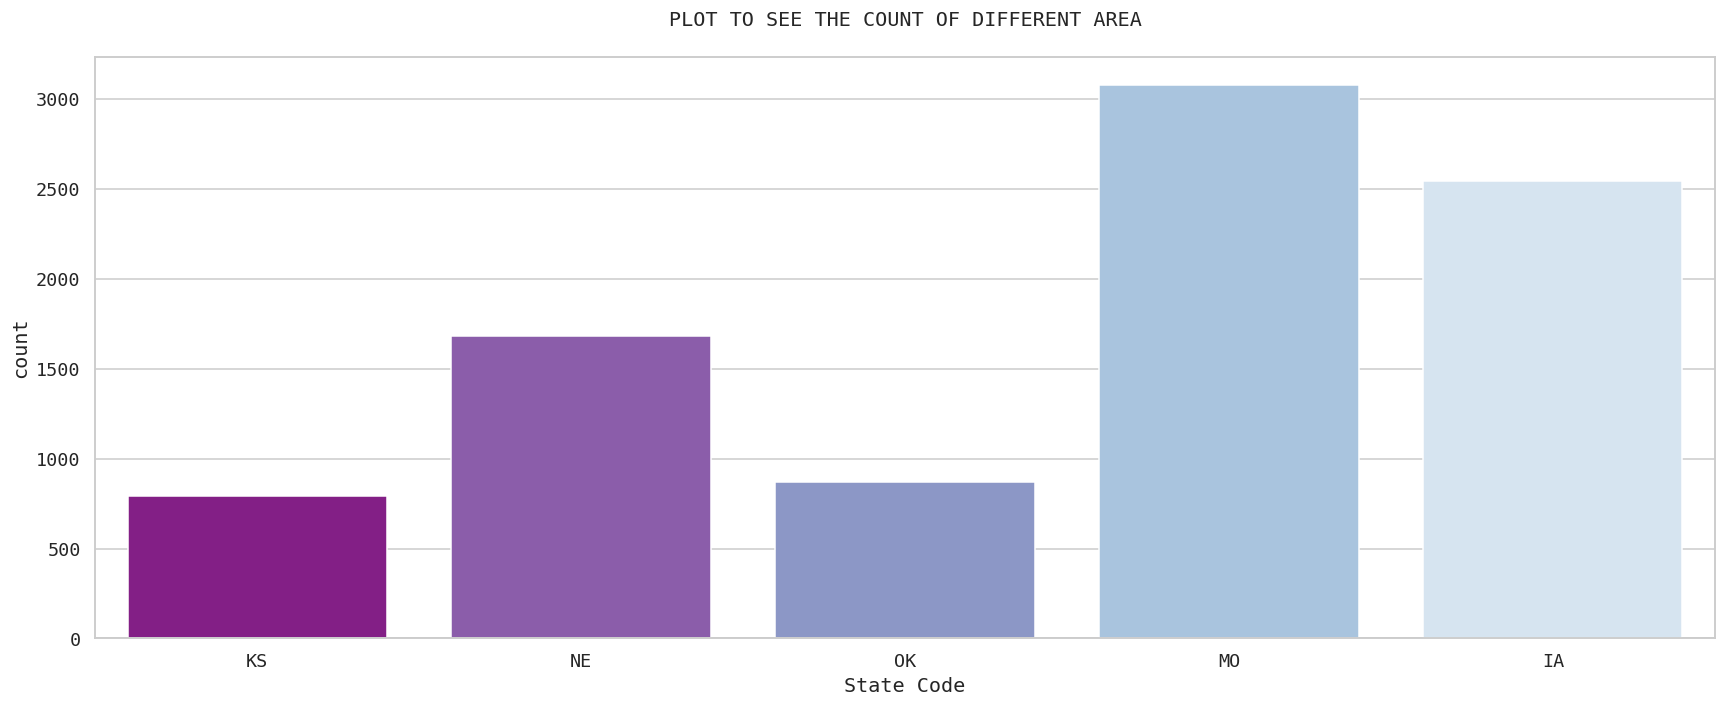

In [22]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='State Code',data=cla,orient='v',palette='BuPu_r',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF DIFFERENT AREA\n')
plt.show()

                THE PLOT SHOWS THAT HIGHEST NUMBER OF INSURANCE CLAIMS ARE DONE BY PEOPLE OF MO(MISSOURI) 

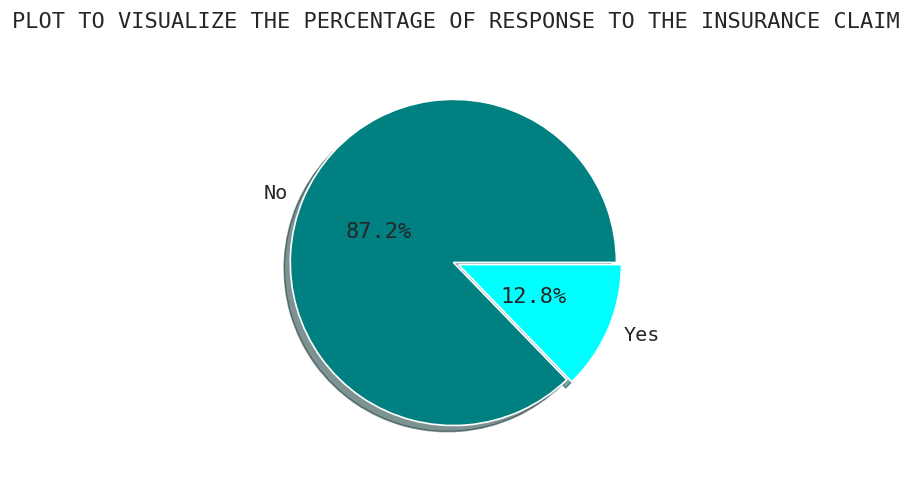

In [23]:
cla_lb=cla['Response'].value_counts().index.tolist()
cla_val=cla['Response'].value_counts().values.tolist()
exp=(0.015,0.015)
clr=('teal','aqua')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF RESPONSE TO THE INSURANCE CLAIM')
plt.show()

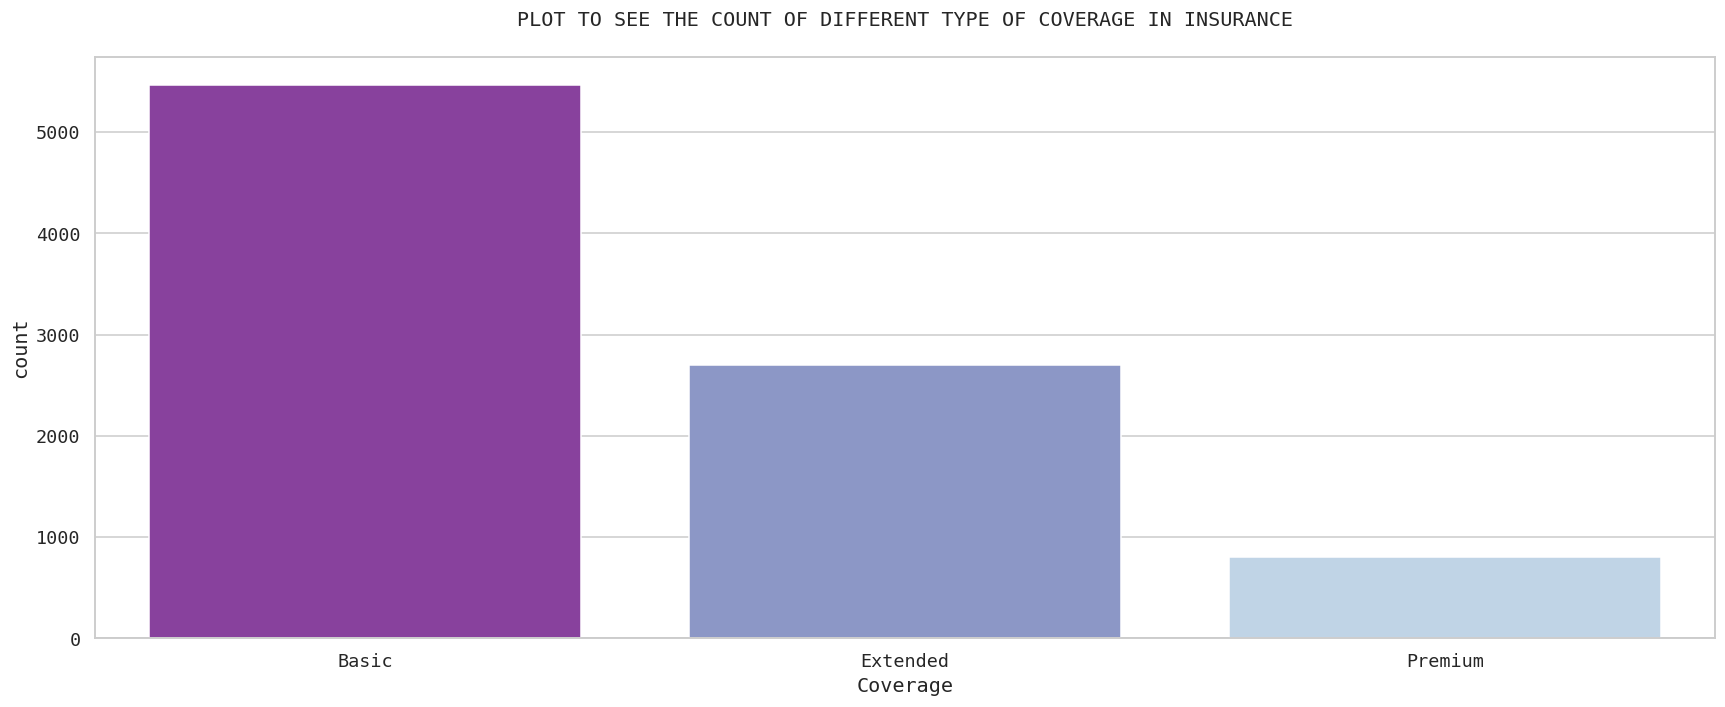

In [24]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='Coverage',data=cla,orient='v',palette='BuPu_r',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF DIFFERENT TYPE OF COVERAGE IN INSURANCE\n')
plt.show()

            THE PLOT SHOWS THAT THE COUNT OF BASIC COVERAGE IS HIGH AS COMPARED TO OTHER TYPES

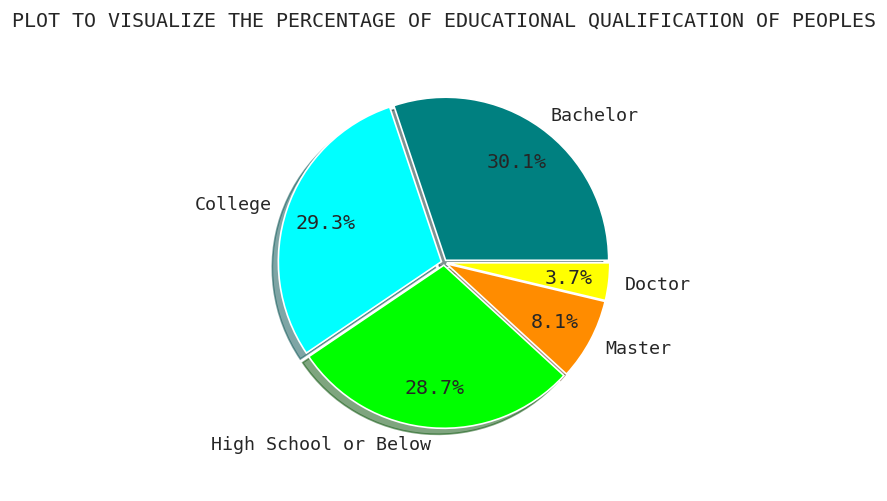

In [25]:
cla_lb=cla['Education'].value_counts().index.tolist()
cla_val=cla['Education'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.015,0.015)
clr=('teal','aqua','lime','darkorange','yellow')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF EDUCATIONAL QUALIFICATION OF PEOPLES')
plt.show()

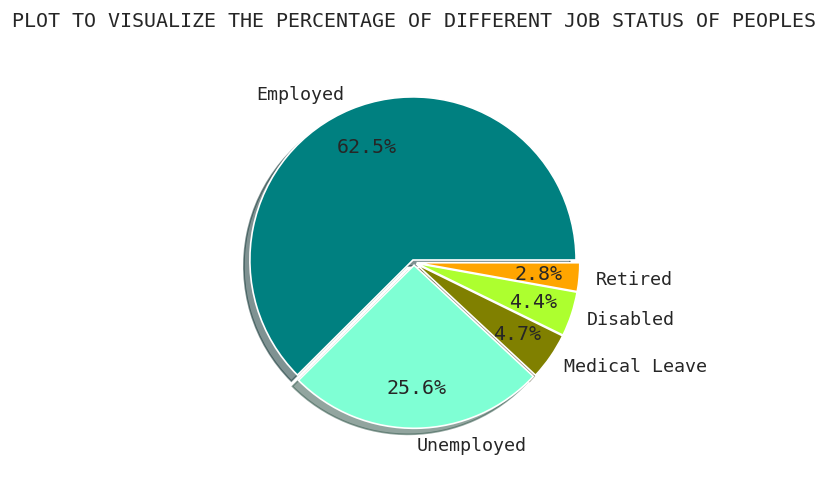

In [26]:
cla_lb=cla['EmploymentStatus'].value_counts().index.tolist()
cla_val=cla['EmploymentStatus'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.015,0.015)
clr=('teal','aquamarine','olive','greenyellow','orange')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF DIFFERENT JOB STATUS OF PEOPLES')
plt.show()

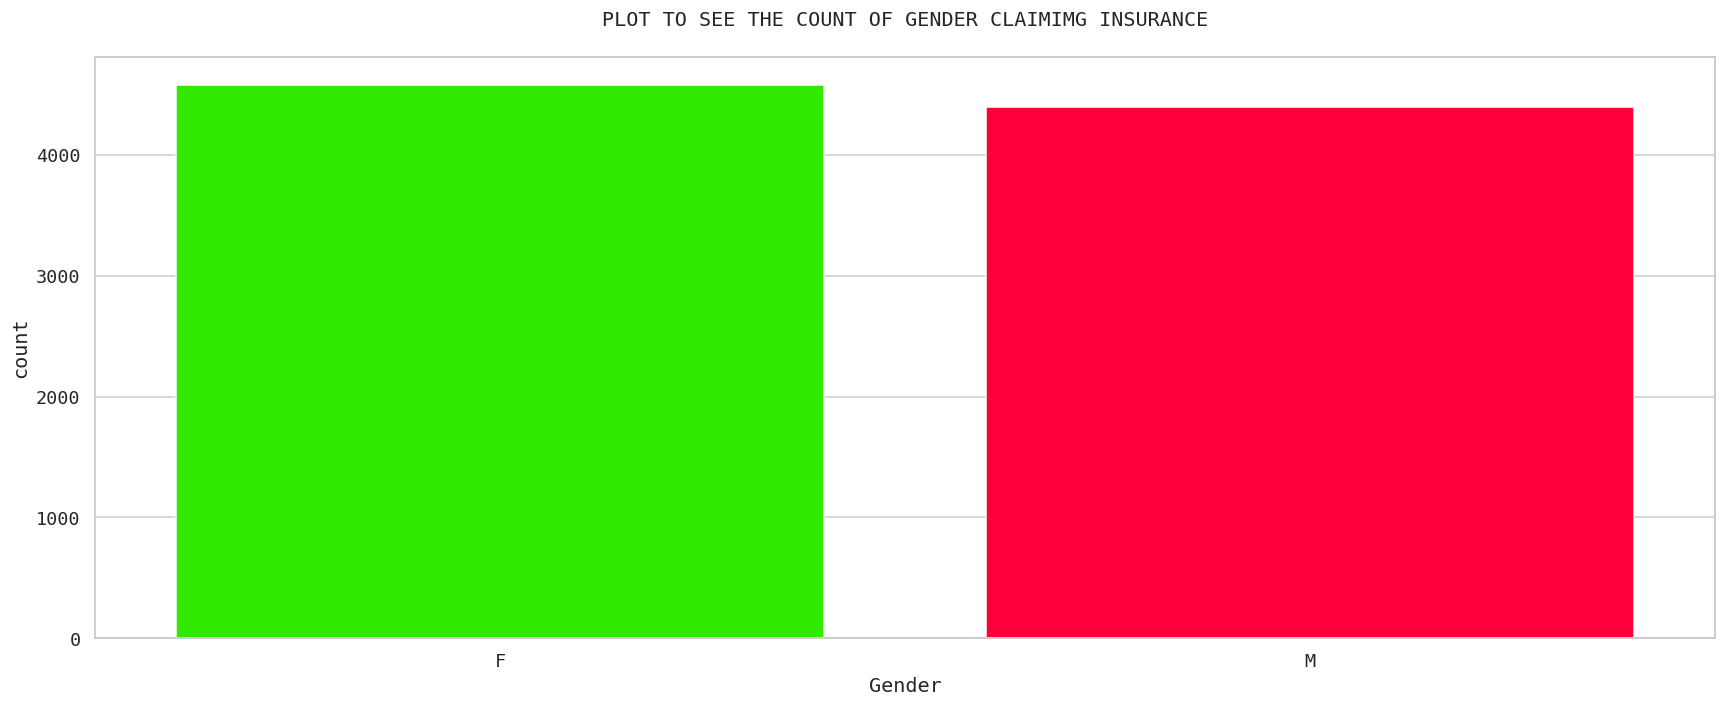

In [27]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='Gender',data=cla,orient='v',palette='prism',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF GENDER CLAIMIMG INSURANCE\n')
plt.show()

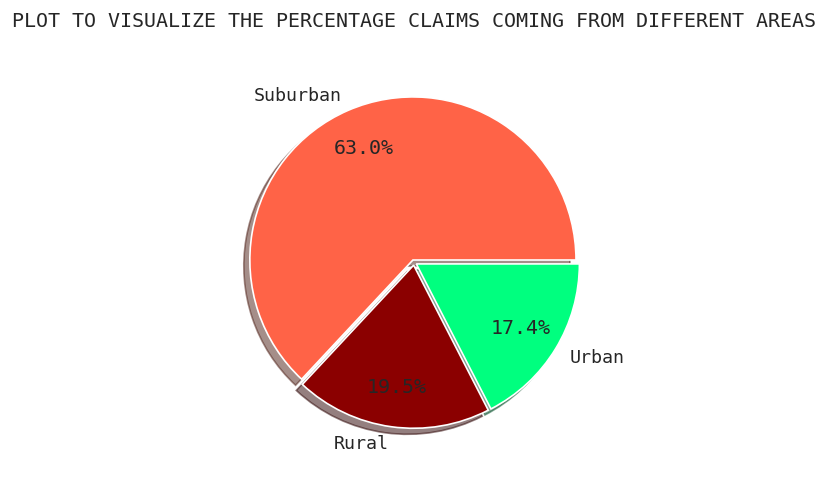

In [28]:
cla_lb=cla['Location Code'].value_counts().index.tolist()
cla_val=cla['Location Code'].value_counts().values.tolist()
exp=(0.015,0.015,0.015)
clr=('tomato','darkred','springgreen')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE CLAIMS COMING FROM DIFFERENT AREAS')
plt.show()

                        A HGHER PERCENTAGE OF CLAIM IS COMING FEOM SUB URBS OF US

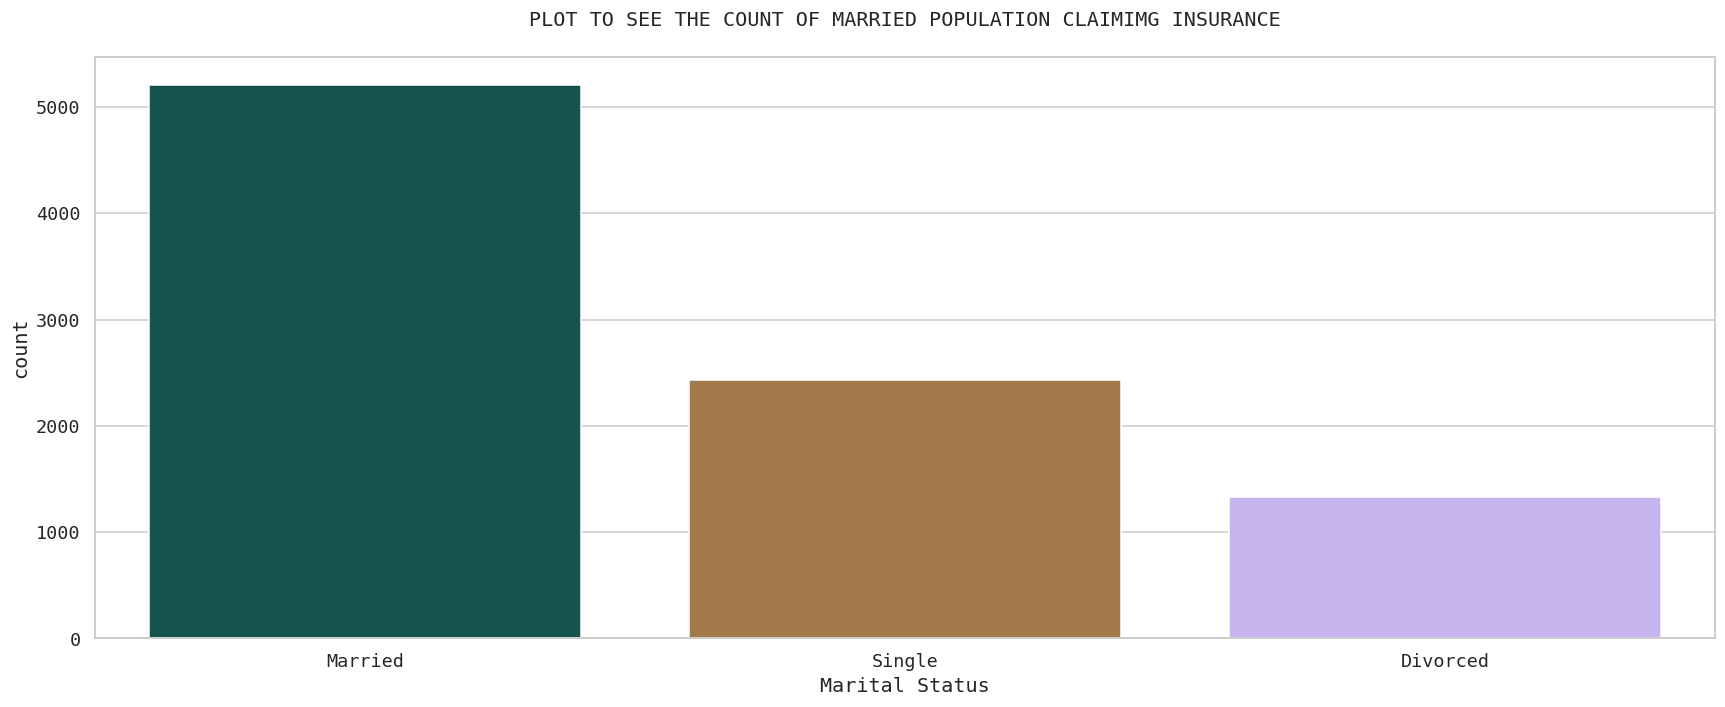

In [29]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='Marital Status',data=cla,orient='v',palette='cubehelix',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF MARRIED POPULATION CLAIMIMG INSURANCE\n')
plt.show()

                                        MAXIMUM PEOPLE CLAIMING THEIR ARE MARRIED 

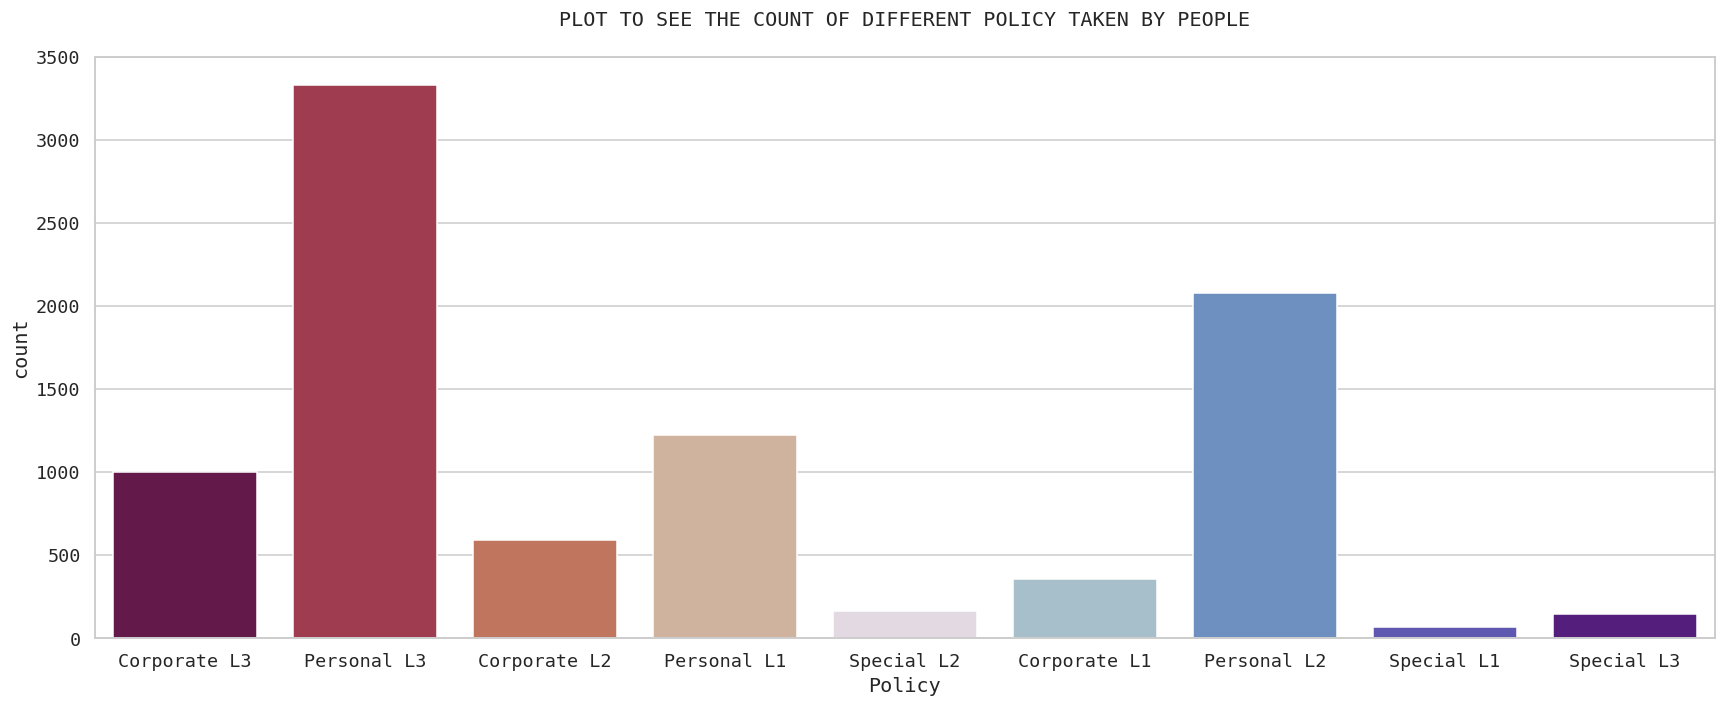

In [30]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='Policy',data=cla,orient='v',palette='twilight_shifted_r',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF DIFFERENT POLICY TAKEN BY PEOPLE\n')
plt.show()

                            PERSONAL L3 KIND POLICY HAS HIGHEST NUMBER OF HOLDER

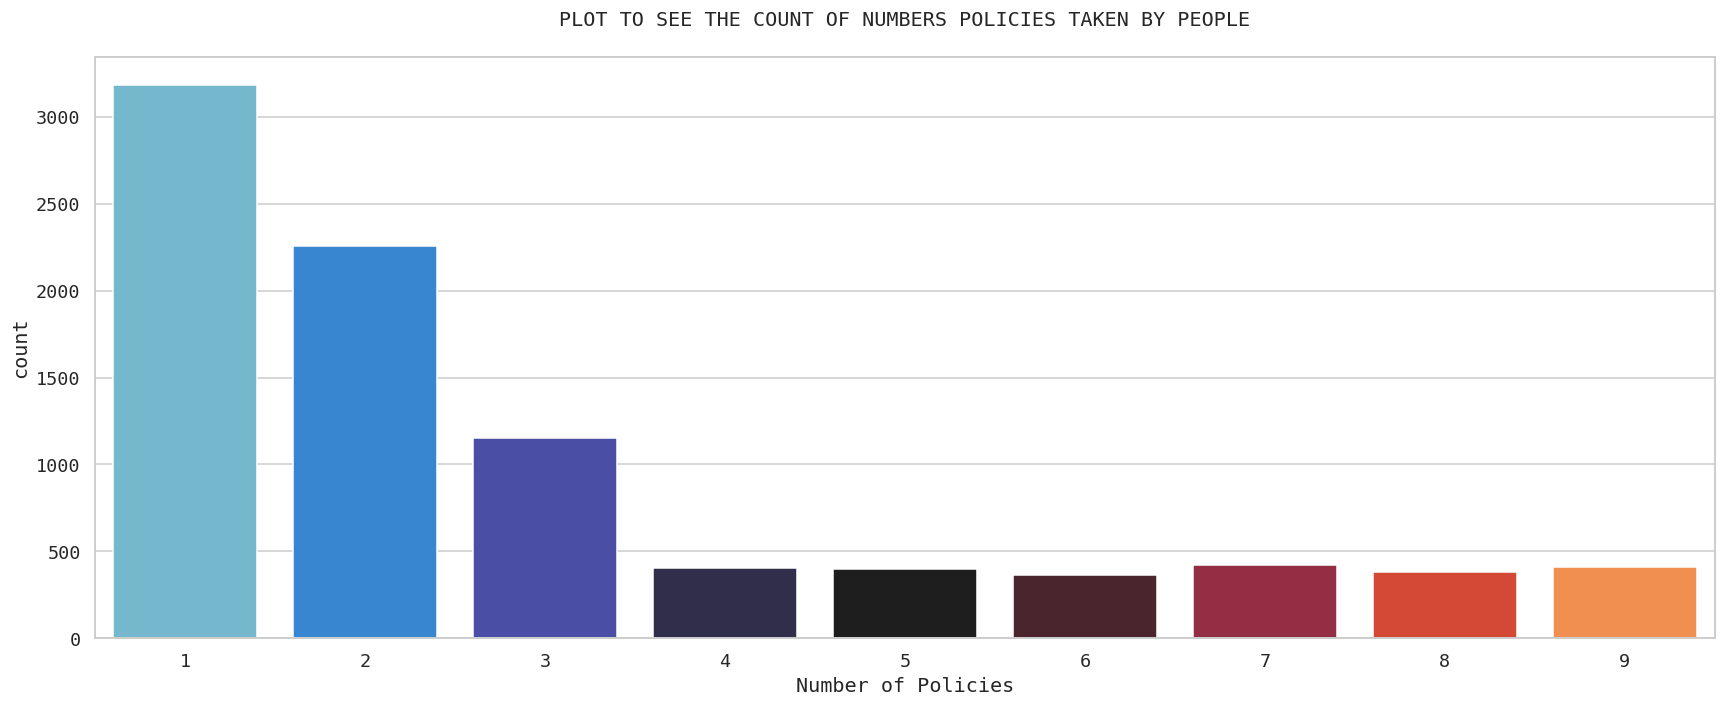

In [31]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='Number of Policies',data=cla,orient='v',palette='icefire',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF NUMBERS POLICIES TAKEN BY PEOPLE\n')
plt.show()

                                        MAXIMUM POPULATION HAVE A SINGLE POLICY 

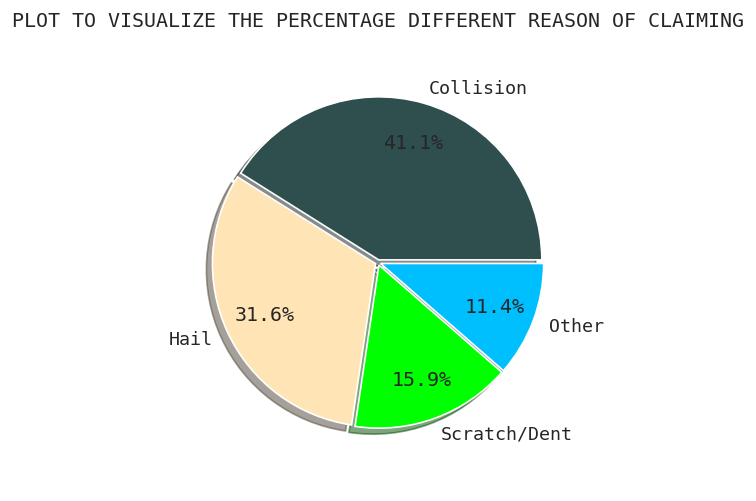

In [32]:
cla_lb=cla['Claim Reason'].value_counts().index.tolist()
cla_val=cla['Claim Reason'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.015)
clr=('darkslategrey','moccasin','lime','deepskyblue')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE DIFFERENT REASON OF CLAIMING')
plt.show()

                            A HIGHER PERCENTAGE OF CLAIM IS DUE TO COLLISION CASES

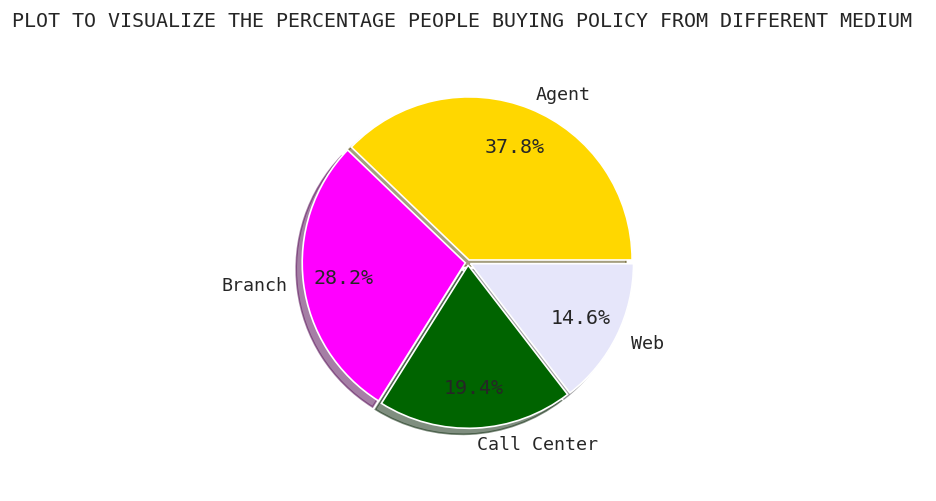

In [33]:
cla_lb=cla['Sales Channel'].value_counts().index.tolist()
cla_val=cla['Sales Channel'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.015)
clr=('gold','magenta','darkgreen','lavender')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE PEOPLE BUYING POLICY FROM DIFFERENT MEDIUM ')
plt.show()

                                MAXIMUM PERCENTAGE OF POLICY IS SOLD TO PEOPLE VIA AGENTS

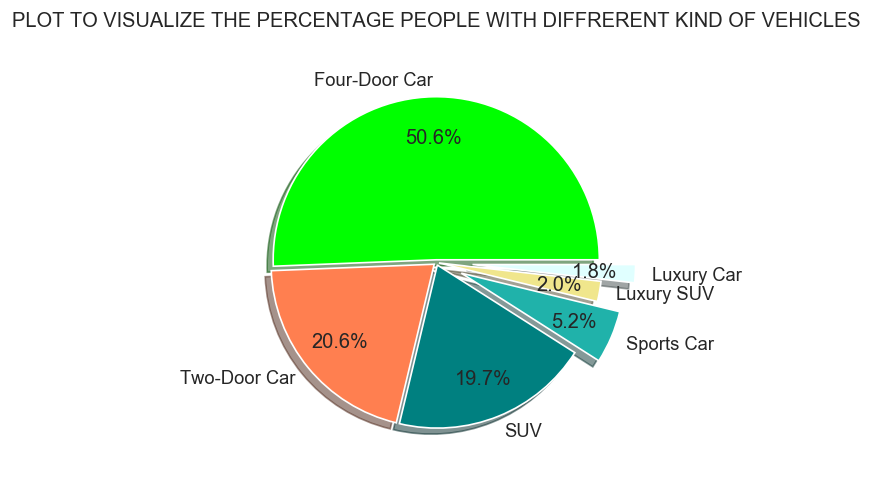

In [34]:
cla_lb=cla['Vehicle Class'].value_counts().index.tolist()
cla_val=cla['Vehicle Class'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.15,0.015,0.2)
clr=('lime','coral','teal','lightseagreen','khaki','lightcyan')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font_scale=1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE PEOPLE WITH DIFFRERENT KIND OF VEHICLES')
plt.show()

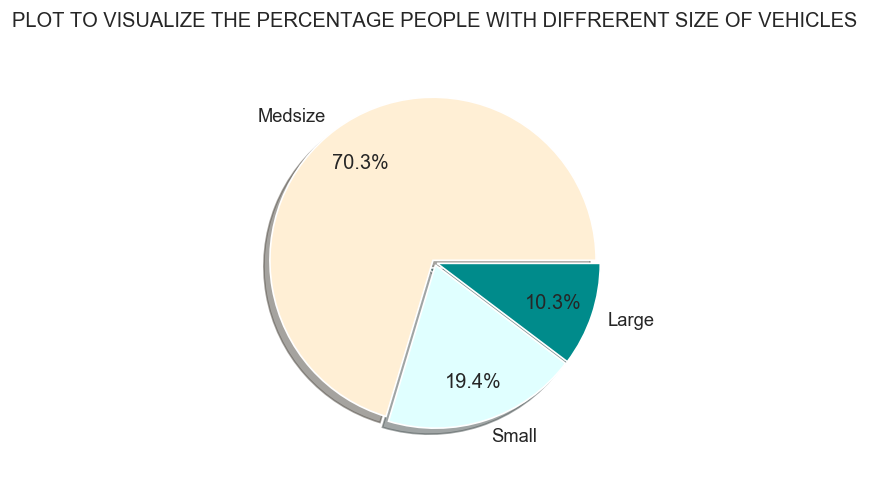

In [35]:
cla_lb=cla['Vehicle Size'].value_counts().index.tolist()
cla_val=cla['Vehicle Size'].value_counts().values.tolist()
exp=(0.015,0.015,0.015)
clr=('papayawhip','lightcyan','darkcyan')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font_scale=1)
plt.pie(x=cla_val,explode=exp,labels=cla_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75,shadow=True,radius=0.9)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE PEOPLE WITH DIFFRERENT SIZE OF VEHICLES')
plt.show()

                            MAXIMUM POPULATION OF PEOPLE HAVE MEDIUM SIZED VEHICLES

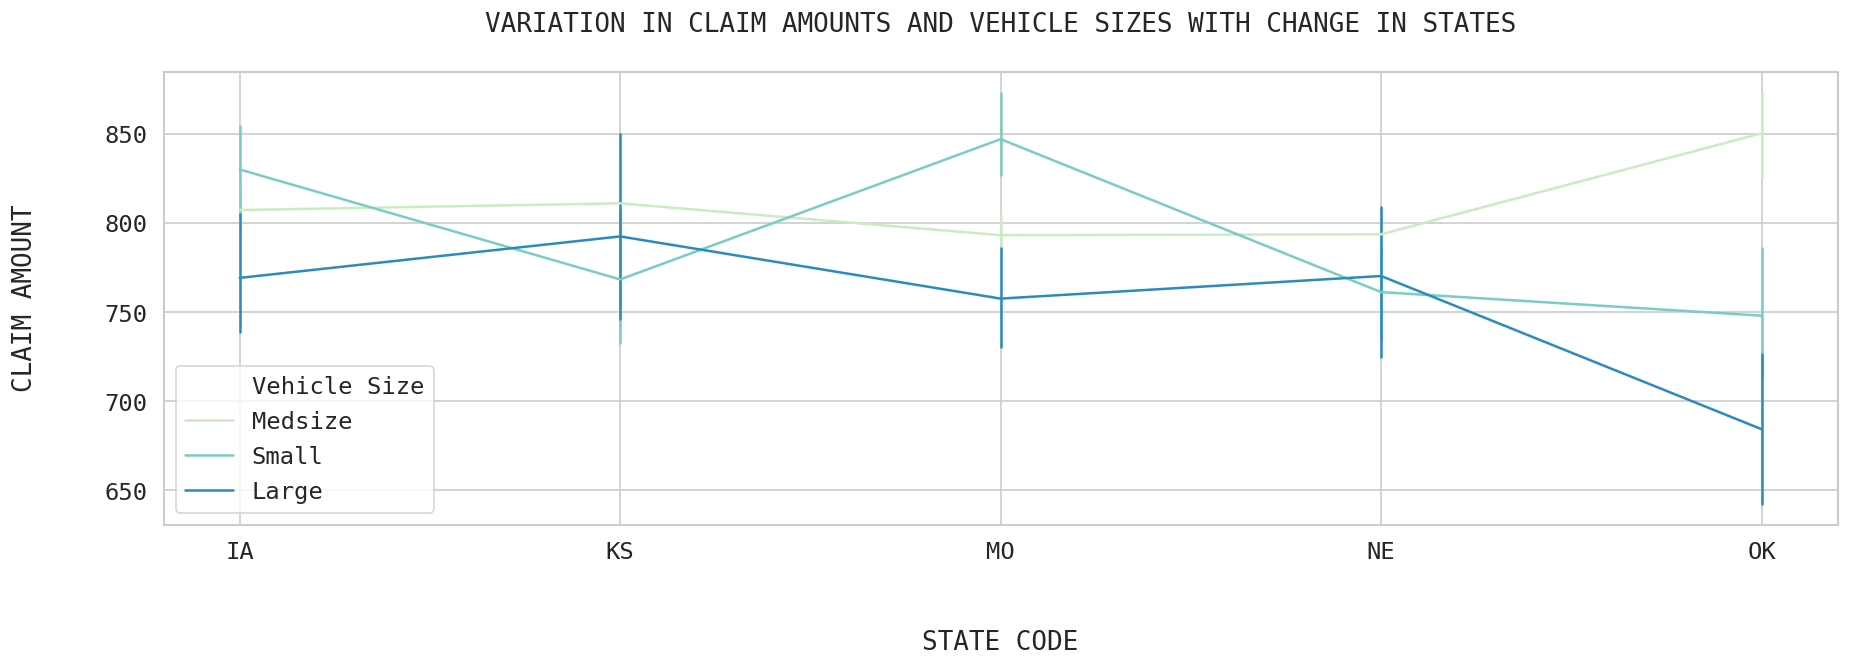

In [36]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="State Code", y='Claim Amount',hue='Vehicle Size',data=cla,palette='GnBu',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.xlabel('\n\nSTATE CODE')
plt.ylabel('CLAIM AMOUNT\n\n')
plt.title('VARIATION IN CLAIM AMOUNTS AND VEHICLE SIZES WITH CHANGE IN STATES\n')
plt.show()

    THE  CLAIM AMOUNT IN MISSOURI IS HIGH FOR SMALL SIZED CAR. IN OKLAHOMA CLAIM AMOUNT IS HIGH FOR MEDIUM SIZED VEHICLE

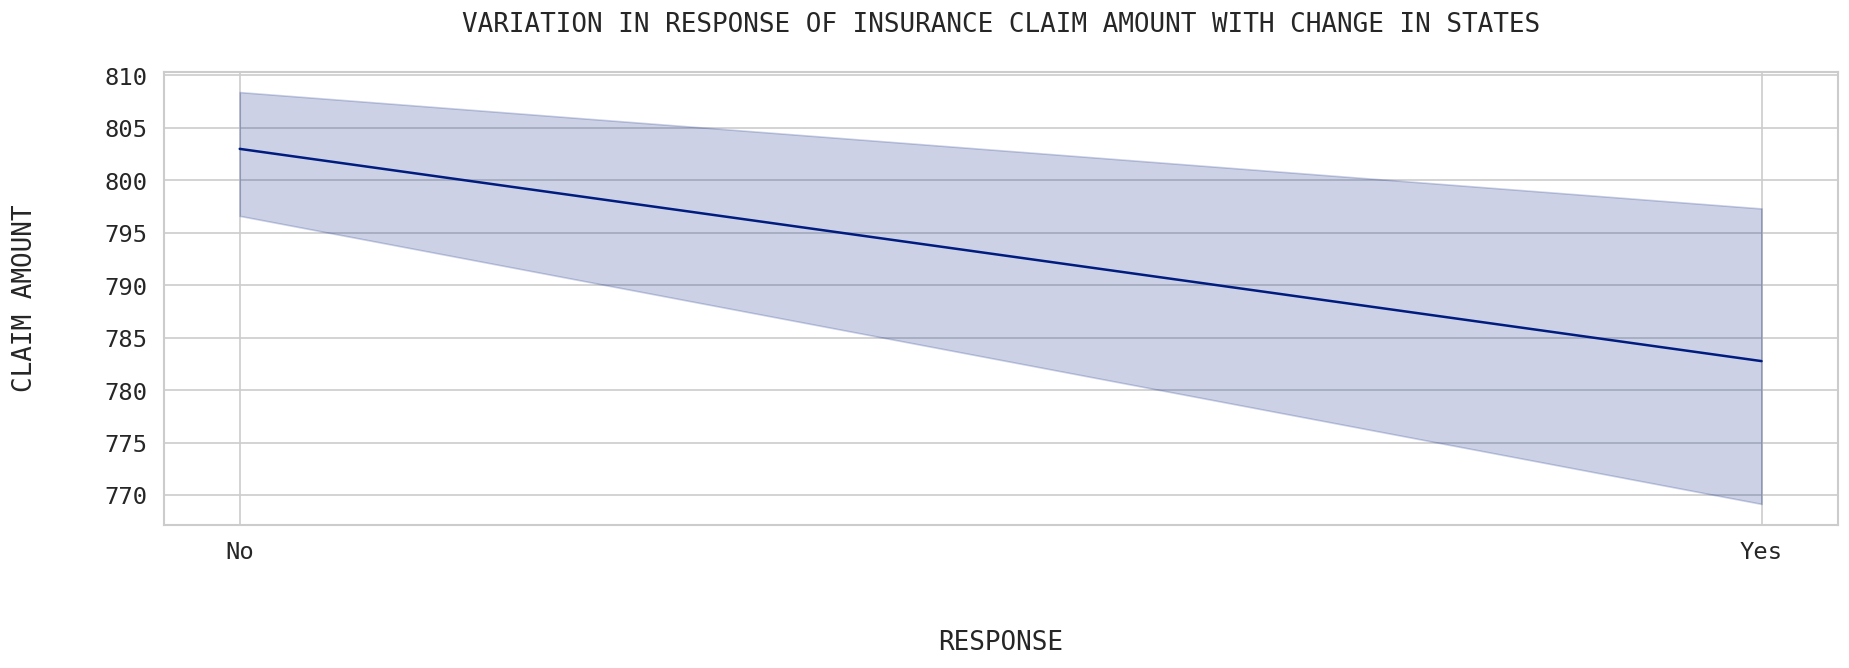

In [37]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Response", y='Claim Amount',data=cla,palette='rainbow',dashes=True,estimator='mean',ci=55,sort=True,err_style='band')
plt.xlabel('\n\nRESPONSE')
plt.ylabel('CLAIM AMOUNT\n\n')
plt.title('VARIATION IN RESPONSE OF INSURANCE CLAIM AMOUNT WITH CHANGE IN STATES\n')
plt.show()

                                        HIGHER CLAIM AMOUNT HAVE HIGHER NEGATIVE RESPONSE

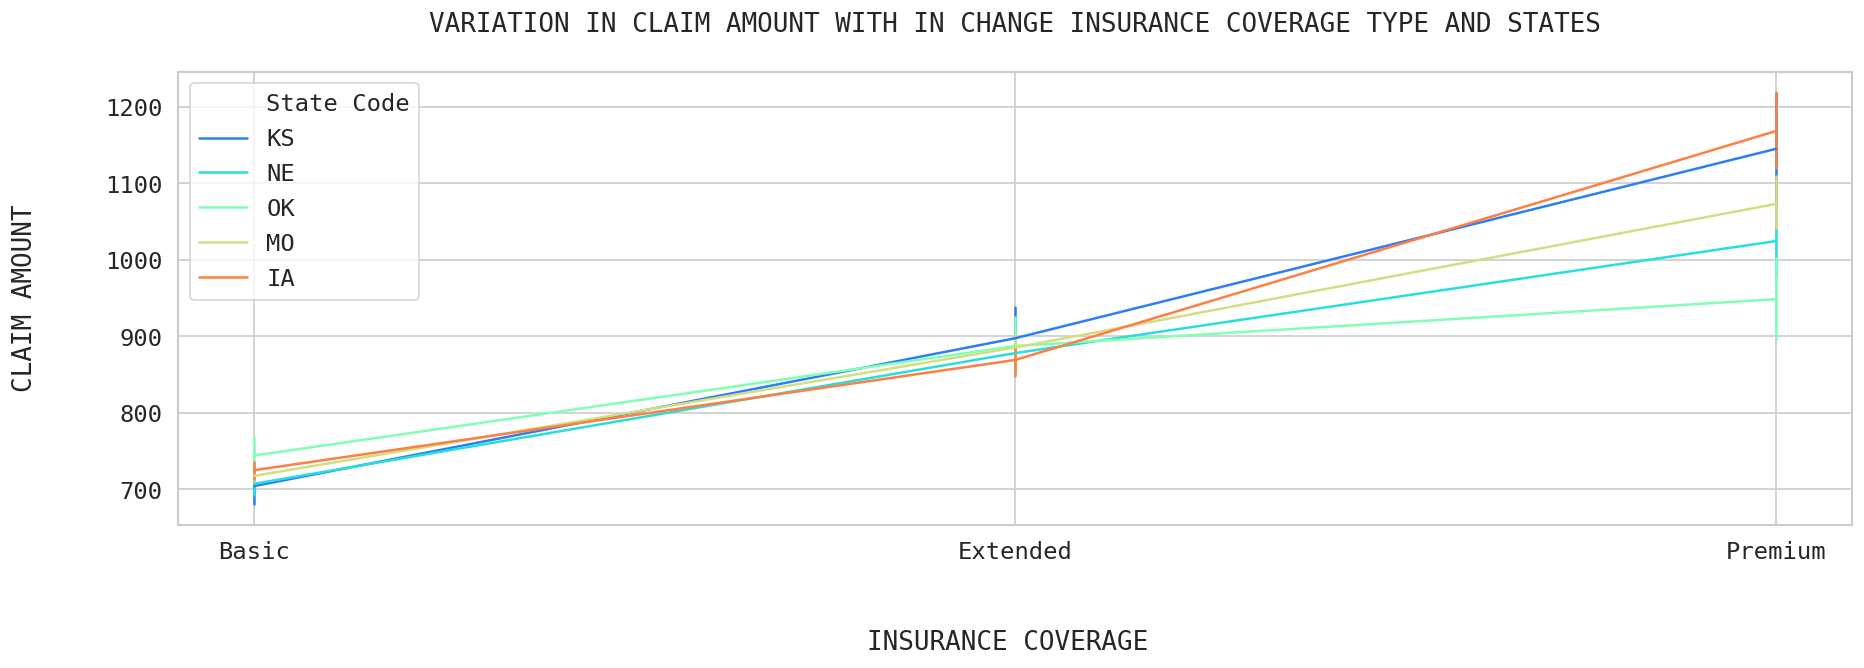

In [38]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Coverage", y='Claim Amount',hue='State Code',data=cla,palette='rainbow',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.xlabel('\n\nINSURANCE COVERAGE ')
plt.ylabel('CLAIM AMOUNT\n\n')
plt.title('VARIATION IN CLAIM AMOUNT WITH IN CHANGE INSURANCE COVERAGE TYPE AND STATES\n')
plt.show()

        THE CLAIM AMOUNT IN PREMIUM INSURANCE COVERAGE PLAN OF IOWA STATE IS HIGH OF ALL TYPE OF COVERAGE AND STATES

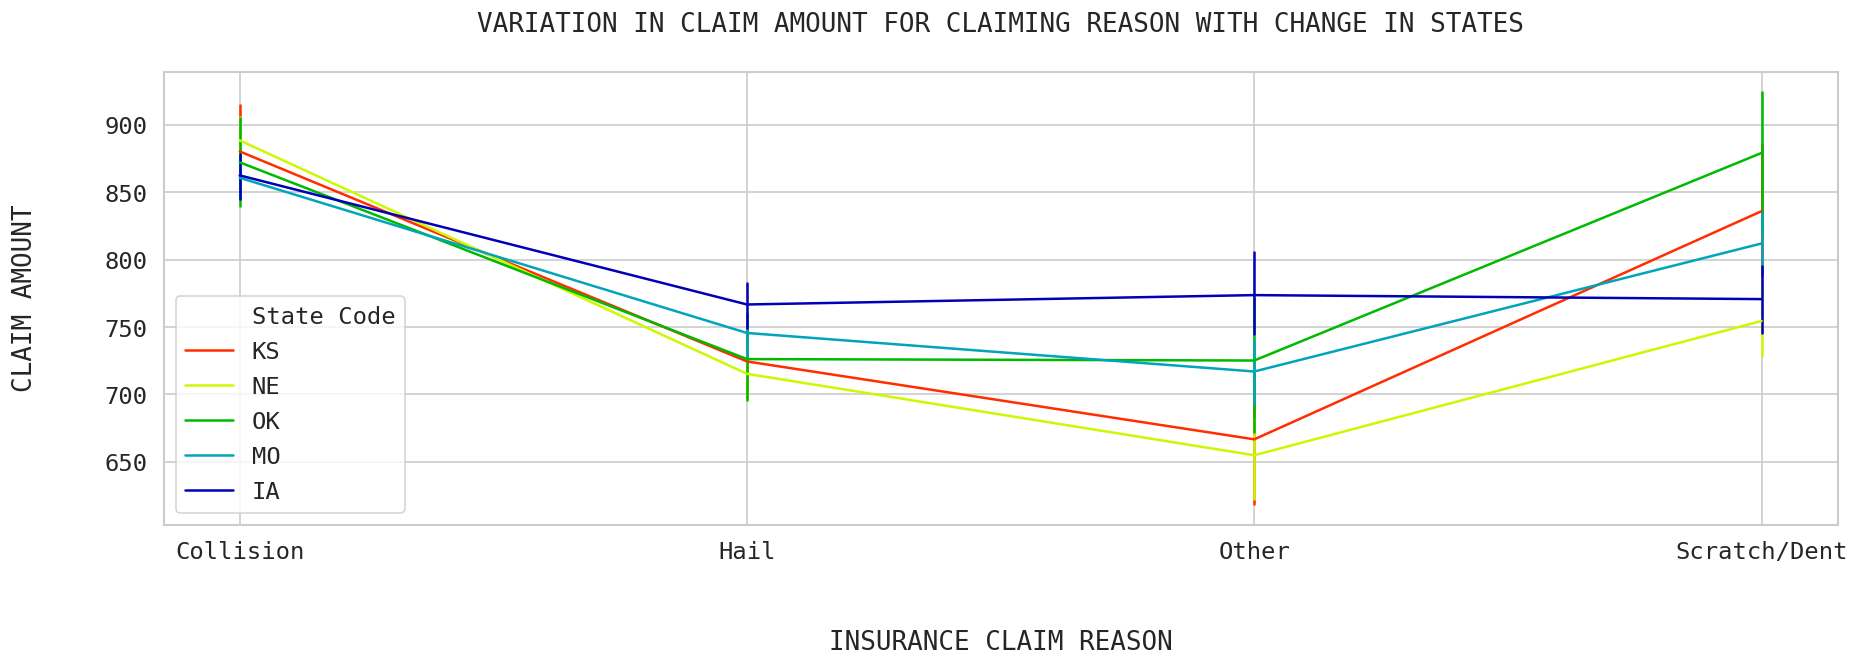

In [39]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Claim Reason", y='Claim Amount',hue='State Code',data=cla,palette='nipy_spectral_r',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.xlabel('\n\nINSURANCE CLAIM REASON')
plt.ylabel('CLAIM AMOUNT\n\n')
plt.title('VARIATION IN CLAIM AMOUNT FOR CLAIMING REASON WITH CHANGE IN STATES\n')
plt.show()

                                        THE CLAIM AMOUNT FOR COLLISIONS ARS HIGH IN ALL STATE

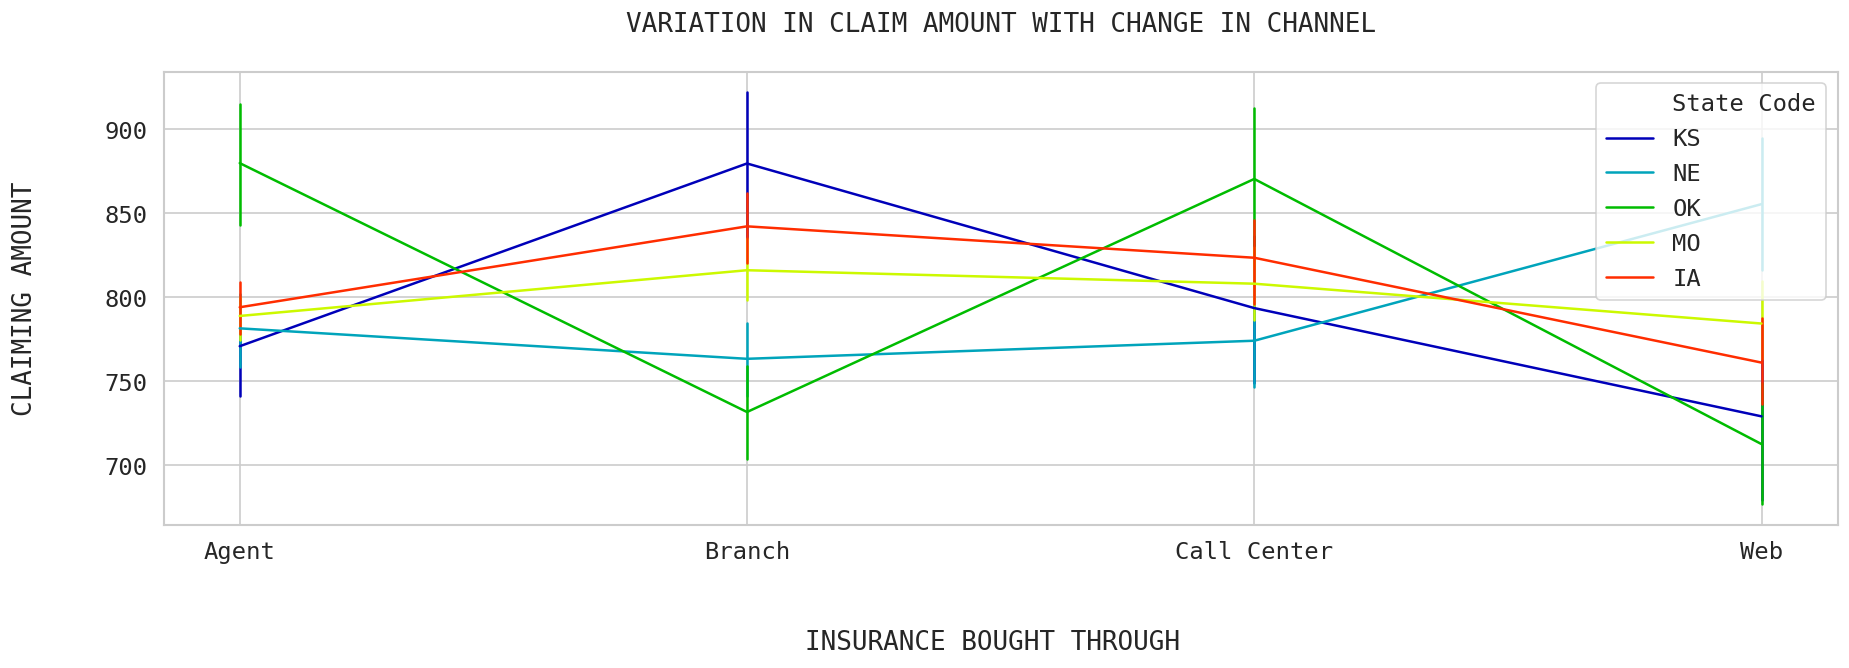

In [40]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Sales Channel", y='Claim Amount',hue='State Code',data=cla,palette='nipy_spectral',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.xlabel('\n\nINSURANCE BOUGHT THROUGH ')
plt.ylabel('CLAIMING AMOUNT\n\n')
plt.title('VARIATION IN CLAIM AMOUNT WITH CHANGE IN CHANNEL\n')
plt.show()

                            IN OKLAHOMA THE CLAIM AMOUNT IS HIGH, WHICH IS SOLD BY AGENTS 

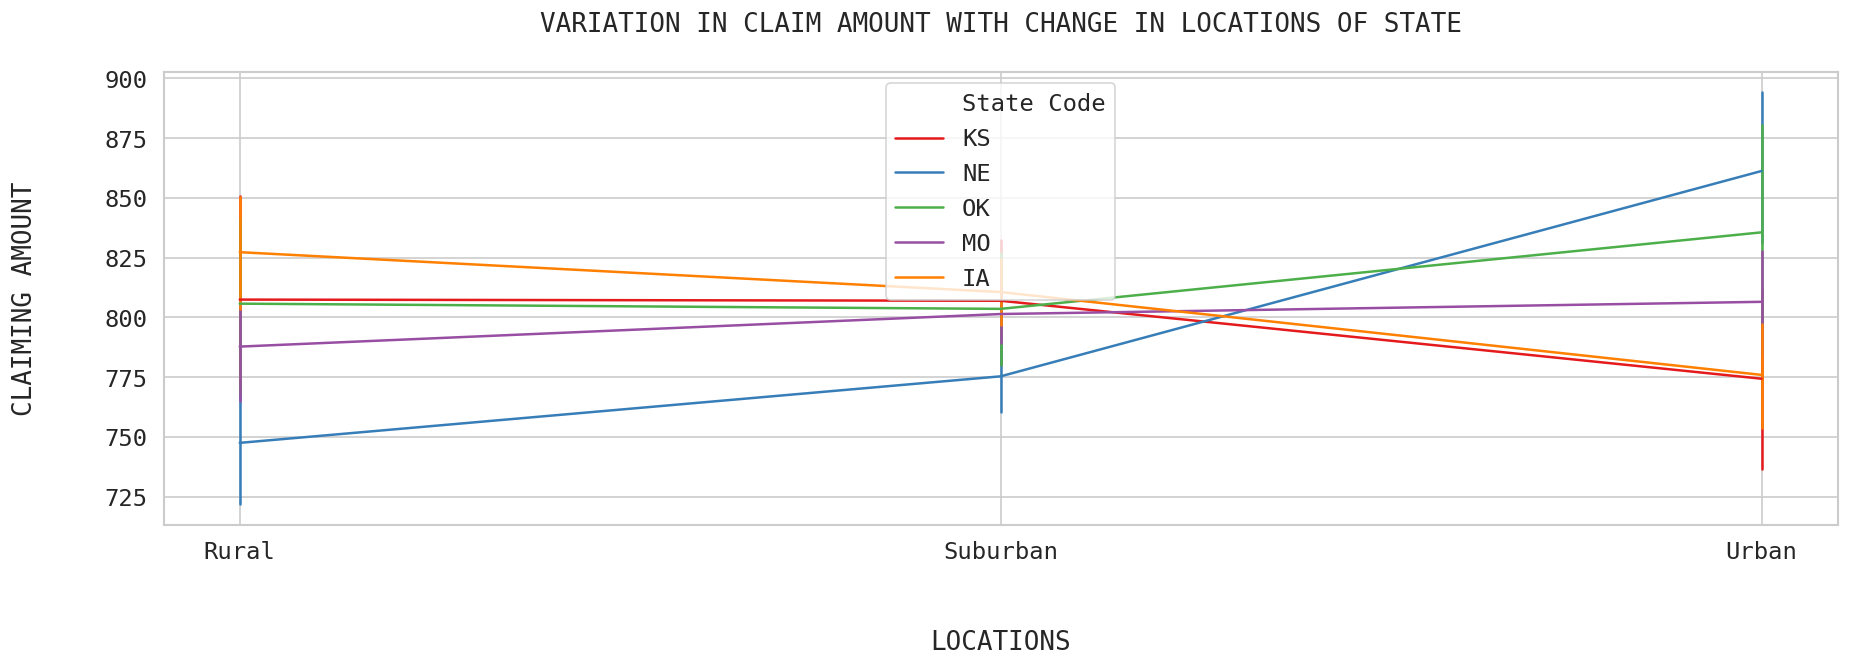

In [41]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Location Code", y='Claim Amount',hue='State Code',data=cla,palette='Set1',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.xlabel('\n\nLOCATIONS')
plt.ylabel('CLAIMING AMOUNT\n\n')
plt.title('VARIATION IN CLAIM AMOUNT WITH CHANGE IN LOCATIONS OF STATE\n')
plt.show()

                                THE HIGHER CLAIMS ARE FROM URBAN REGION OF STATE OF NEBRASKA

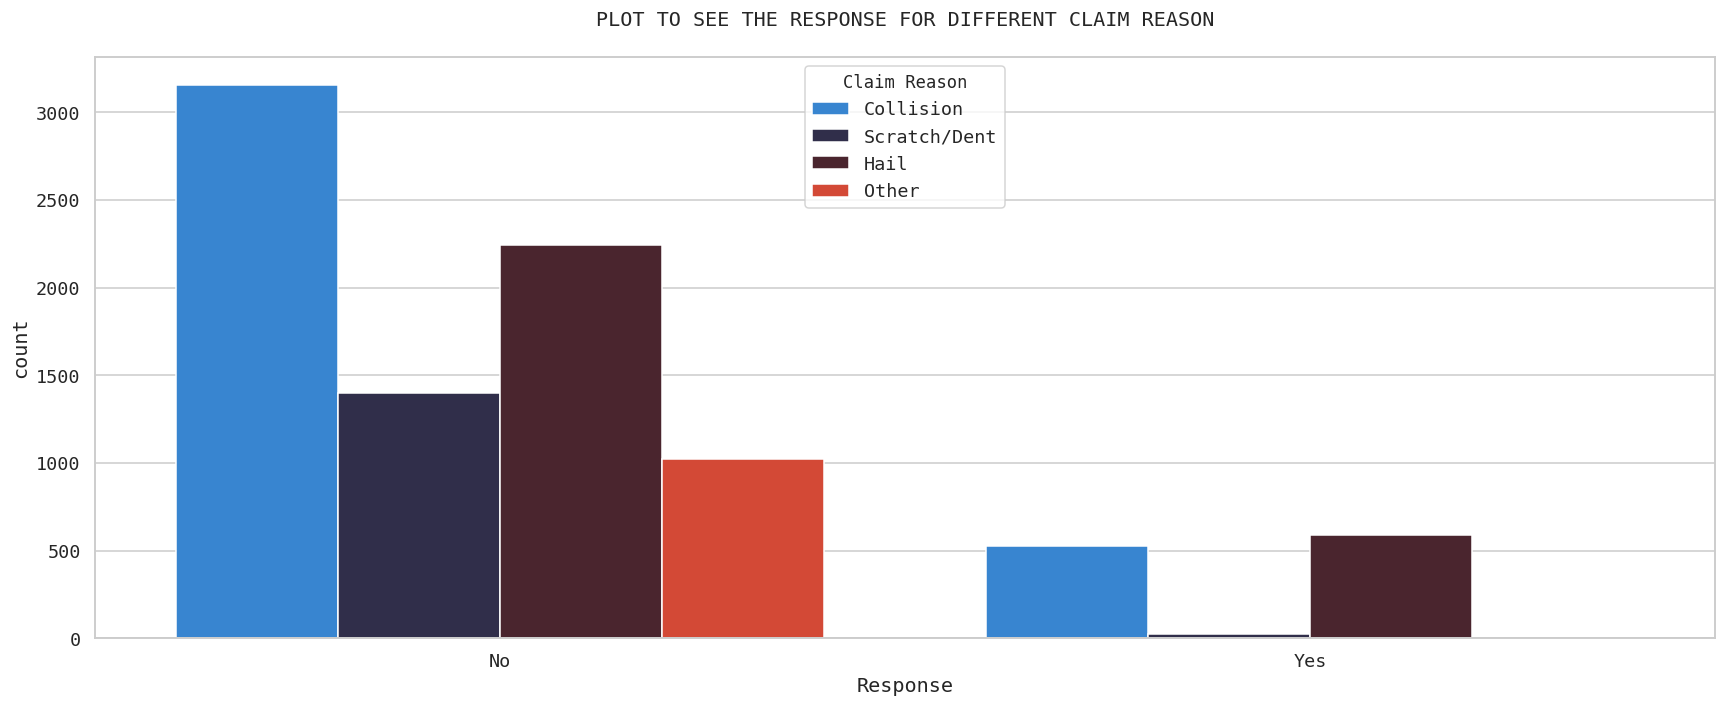

In [42]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='Response',hue='Claim Reason',data=cla,orient='v',palette='icefire',saturation=25)
plt.title('PLOT TO SEE THE RESPONSE FOR DIFFERENT CLAIM REASON\n')
plt.show()

            COLLISION HAS THE HIGHEST  NUMBER OF INSTANCES OF CLAIM AS WELL AS HIGHEST NUMBER OF DECLINATION

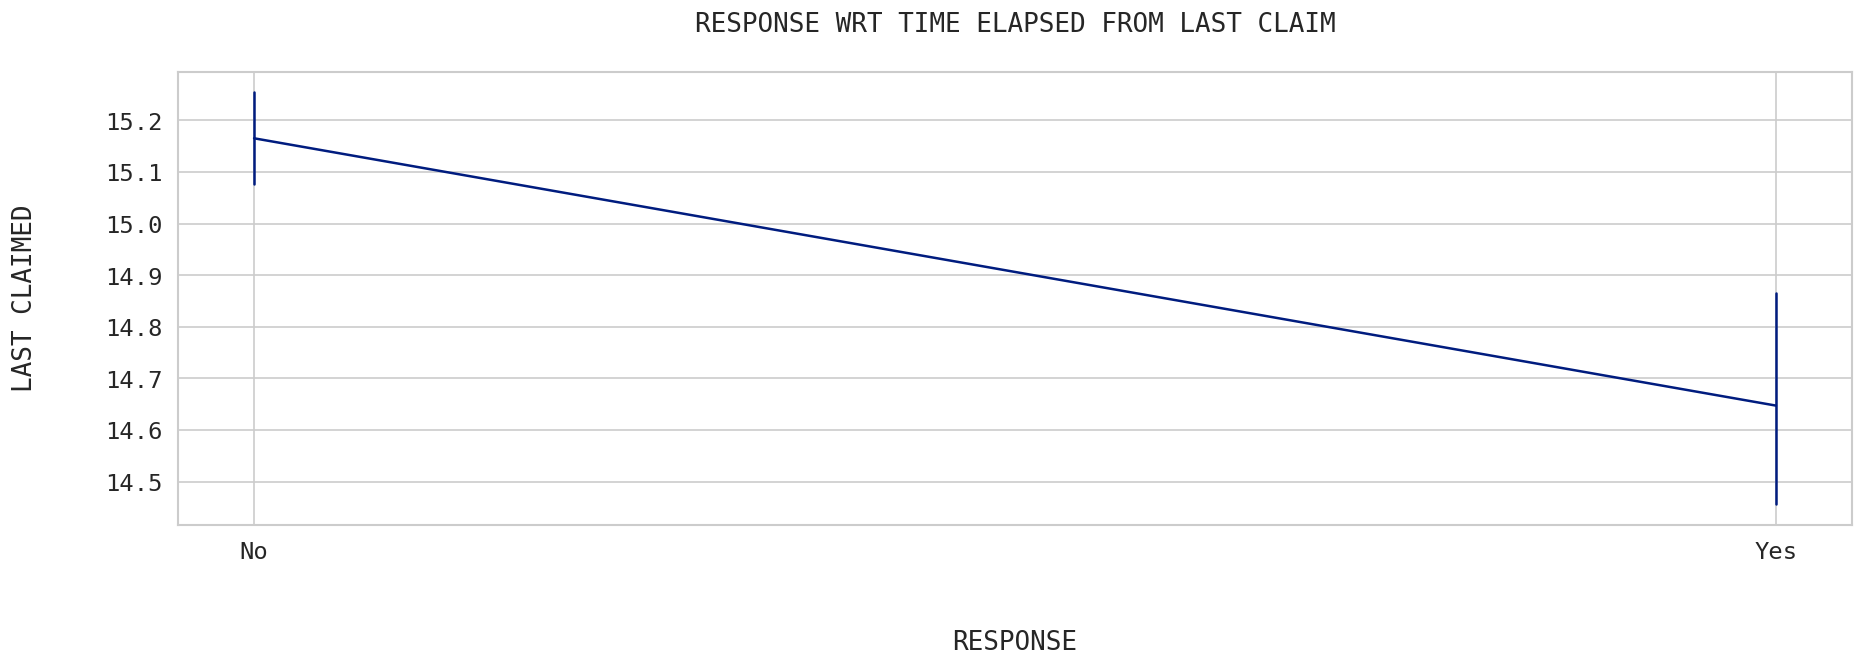

In [43]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Response", y='Months Since Last Claim',data=cla,palette='Set1',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.xlabel('\n\nRESPONSE')
plt.ylabel('LAST CLAIMED\n\n')
plt.title('RESPONSE WRT TIME ELAPSED FROM LAST CLAIM\n')
plt.show()

                        A HIGHER GAP IN CLAIMING THE AMOUNT HAS HIGH RATE OF DECLINATION

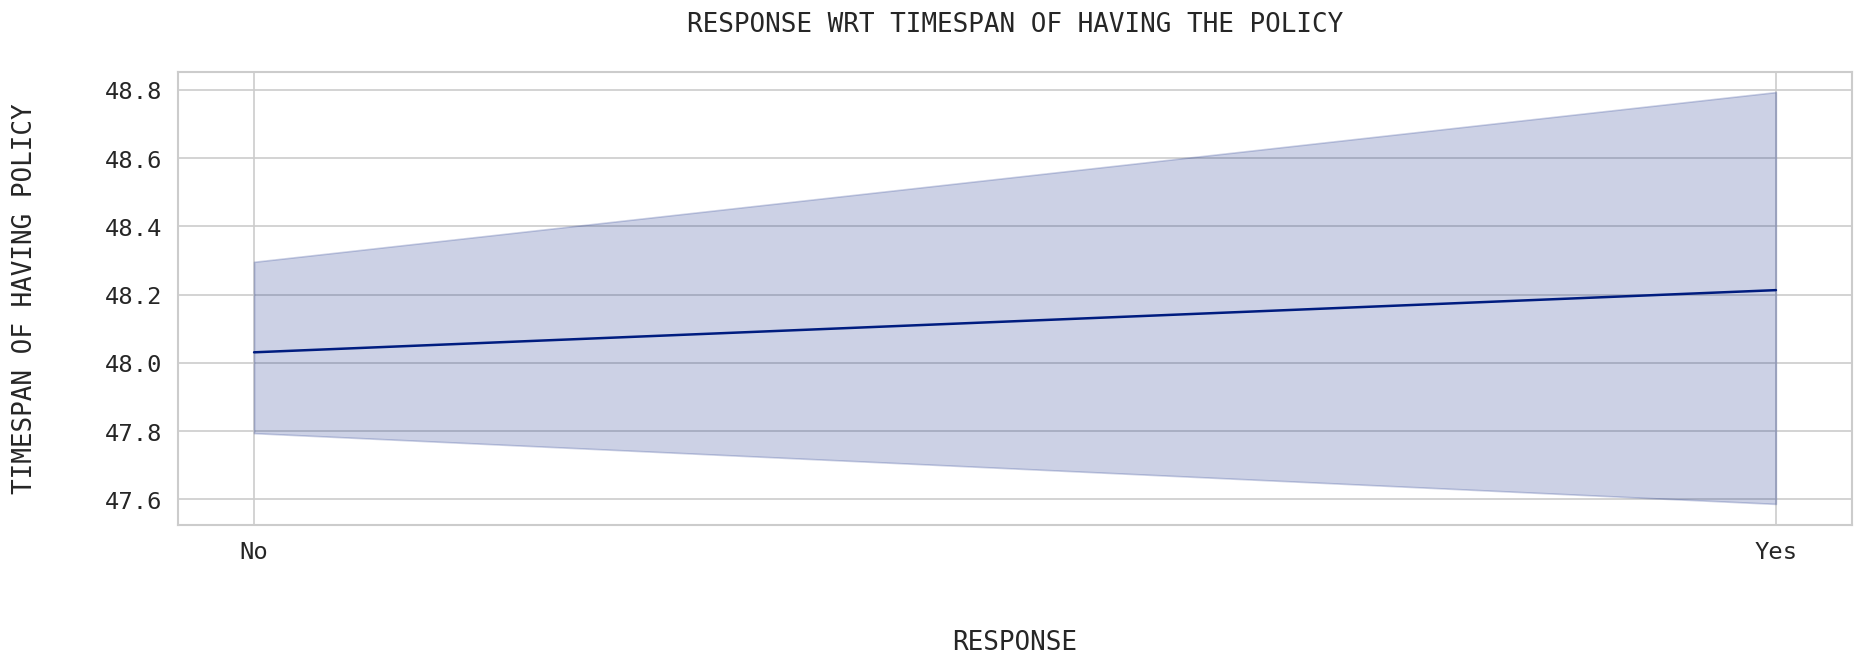

In [44]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Response", y='Months Since Policy Inception',data=cla,palette='Set2',dashes=True,estimator='mean',ci=55,sort=True,err_style='band')
plt.xlabel('\n\nRESPONSE')
plt.ylabel('TIMESPAN OF HAVING POLICY\n\n')
plt.title('RESPONSE WRT TIMESPAN OF HAVING THE POLICY\n')
plt.show()

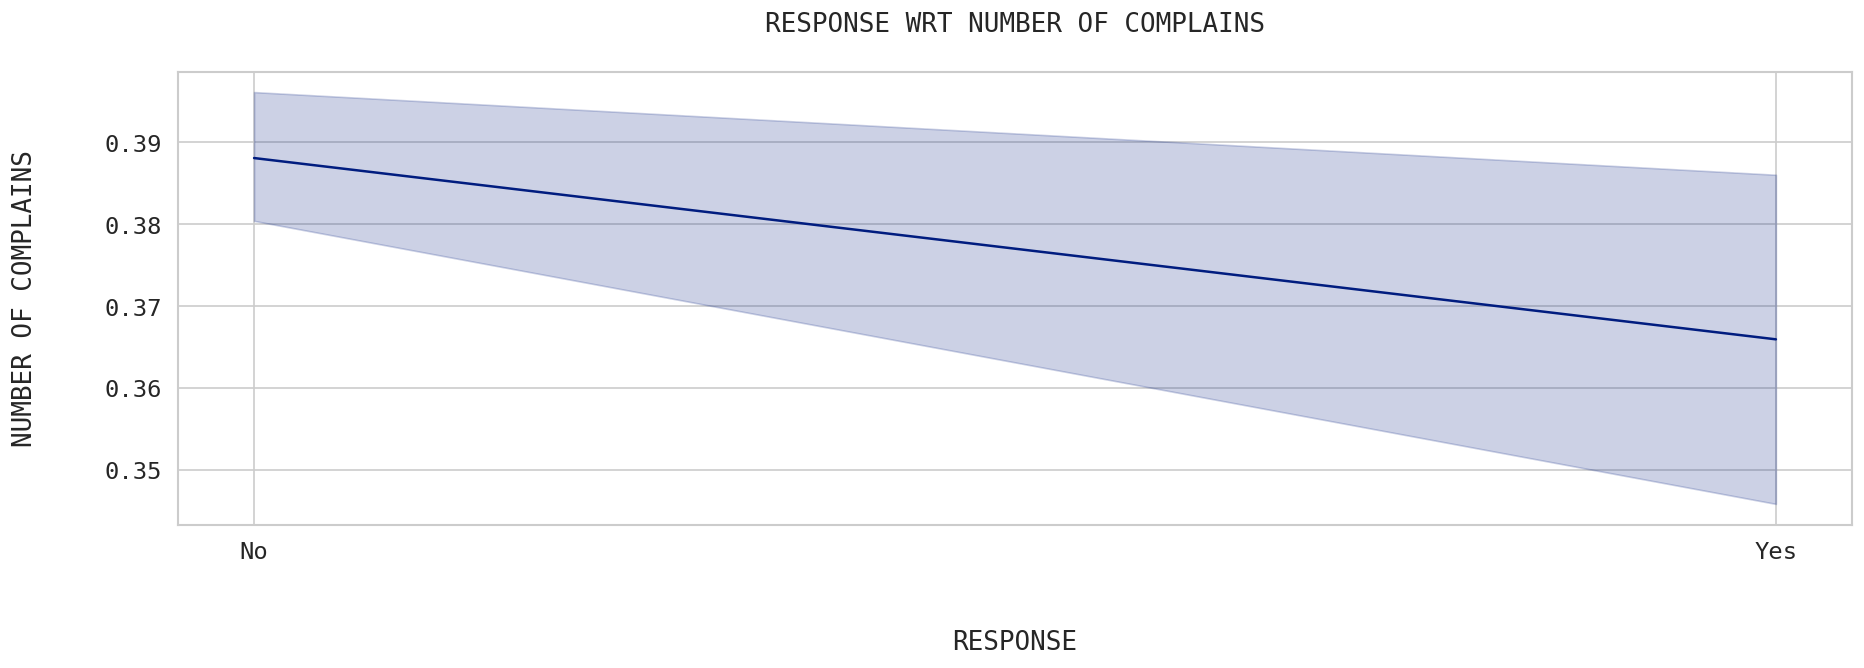

In [45]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="Response", y='Number of Open Complaints',data=cla,palette='Set2',dashes=True,estimator='mean',ci=55,sort=True,err_style='band')
plt.xlabel('\n\nRESPONSE')
plt.ylabel('NUMBER OF COMPLAINS\n\n')
plt.title('RESPONSE WRT NUMBER OF COMPLAINS\n')
plt.show()

                            HIGHER NUMBER OF COMPLAIN LEADS TO HIGH RATE OF DECLINATION

In [46]:
#mapping Yes/No of Response and F/M of Gender with 0 & 1
m1={'F':0,'M':1}
cla['Gender']=cla['Gender'].map(m1)

m2={'No':0,'Yes':1}
cla['Response']=cla['Response'].map(m2)

In [47]:
#USING LABELENCONDER TO ENCODE THE CATEGORICAL VALUES
for i in cla.columns:
    if cla[i].dtypes=='object':
        ll=LabelEncoder()
        cla[i]=ll.fit_transform(cla[i])

In [48]:
cl=cla.columns.values

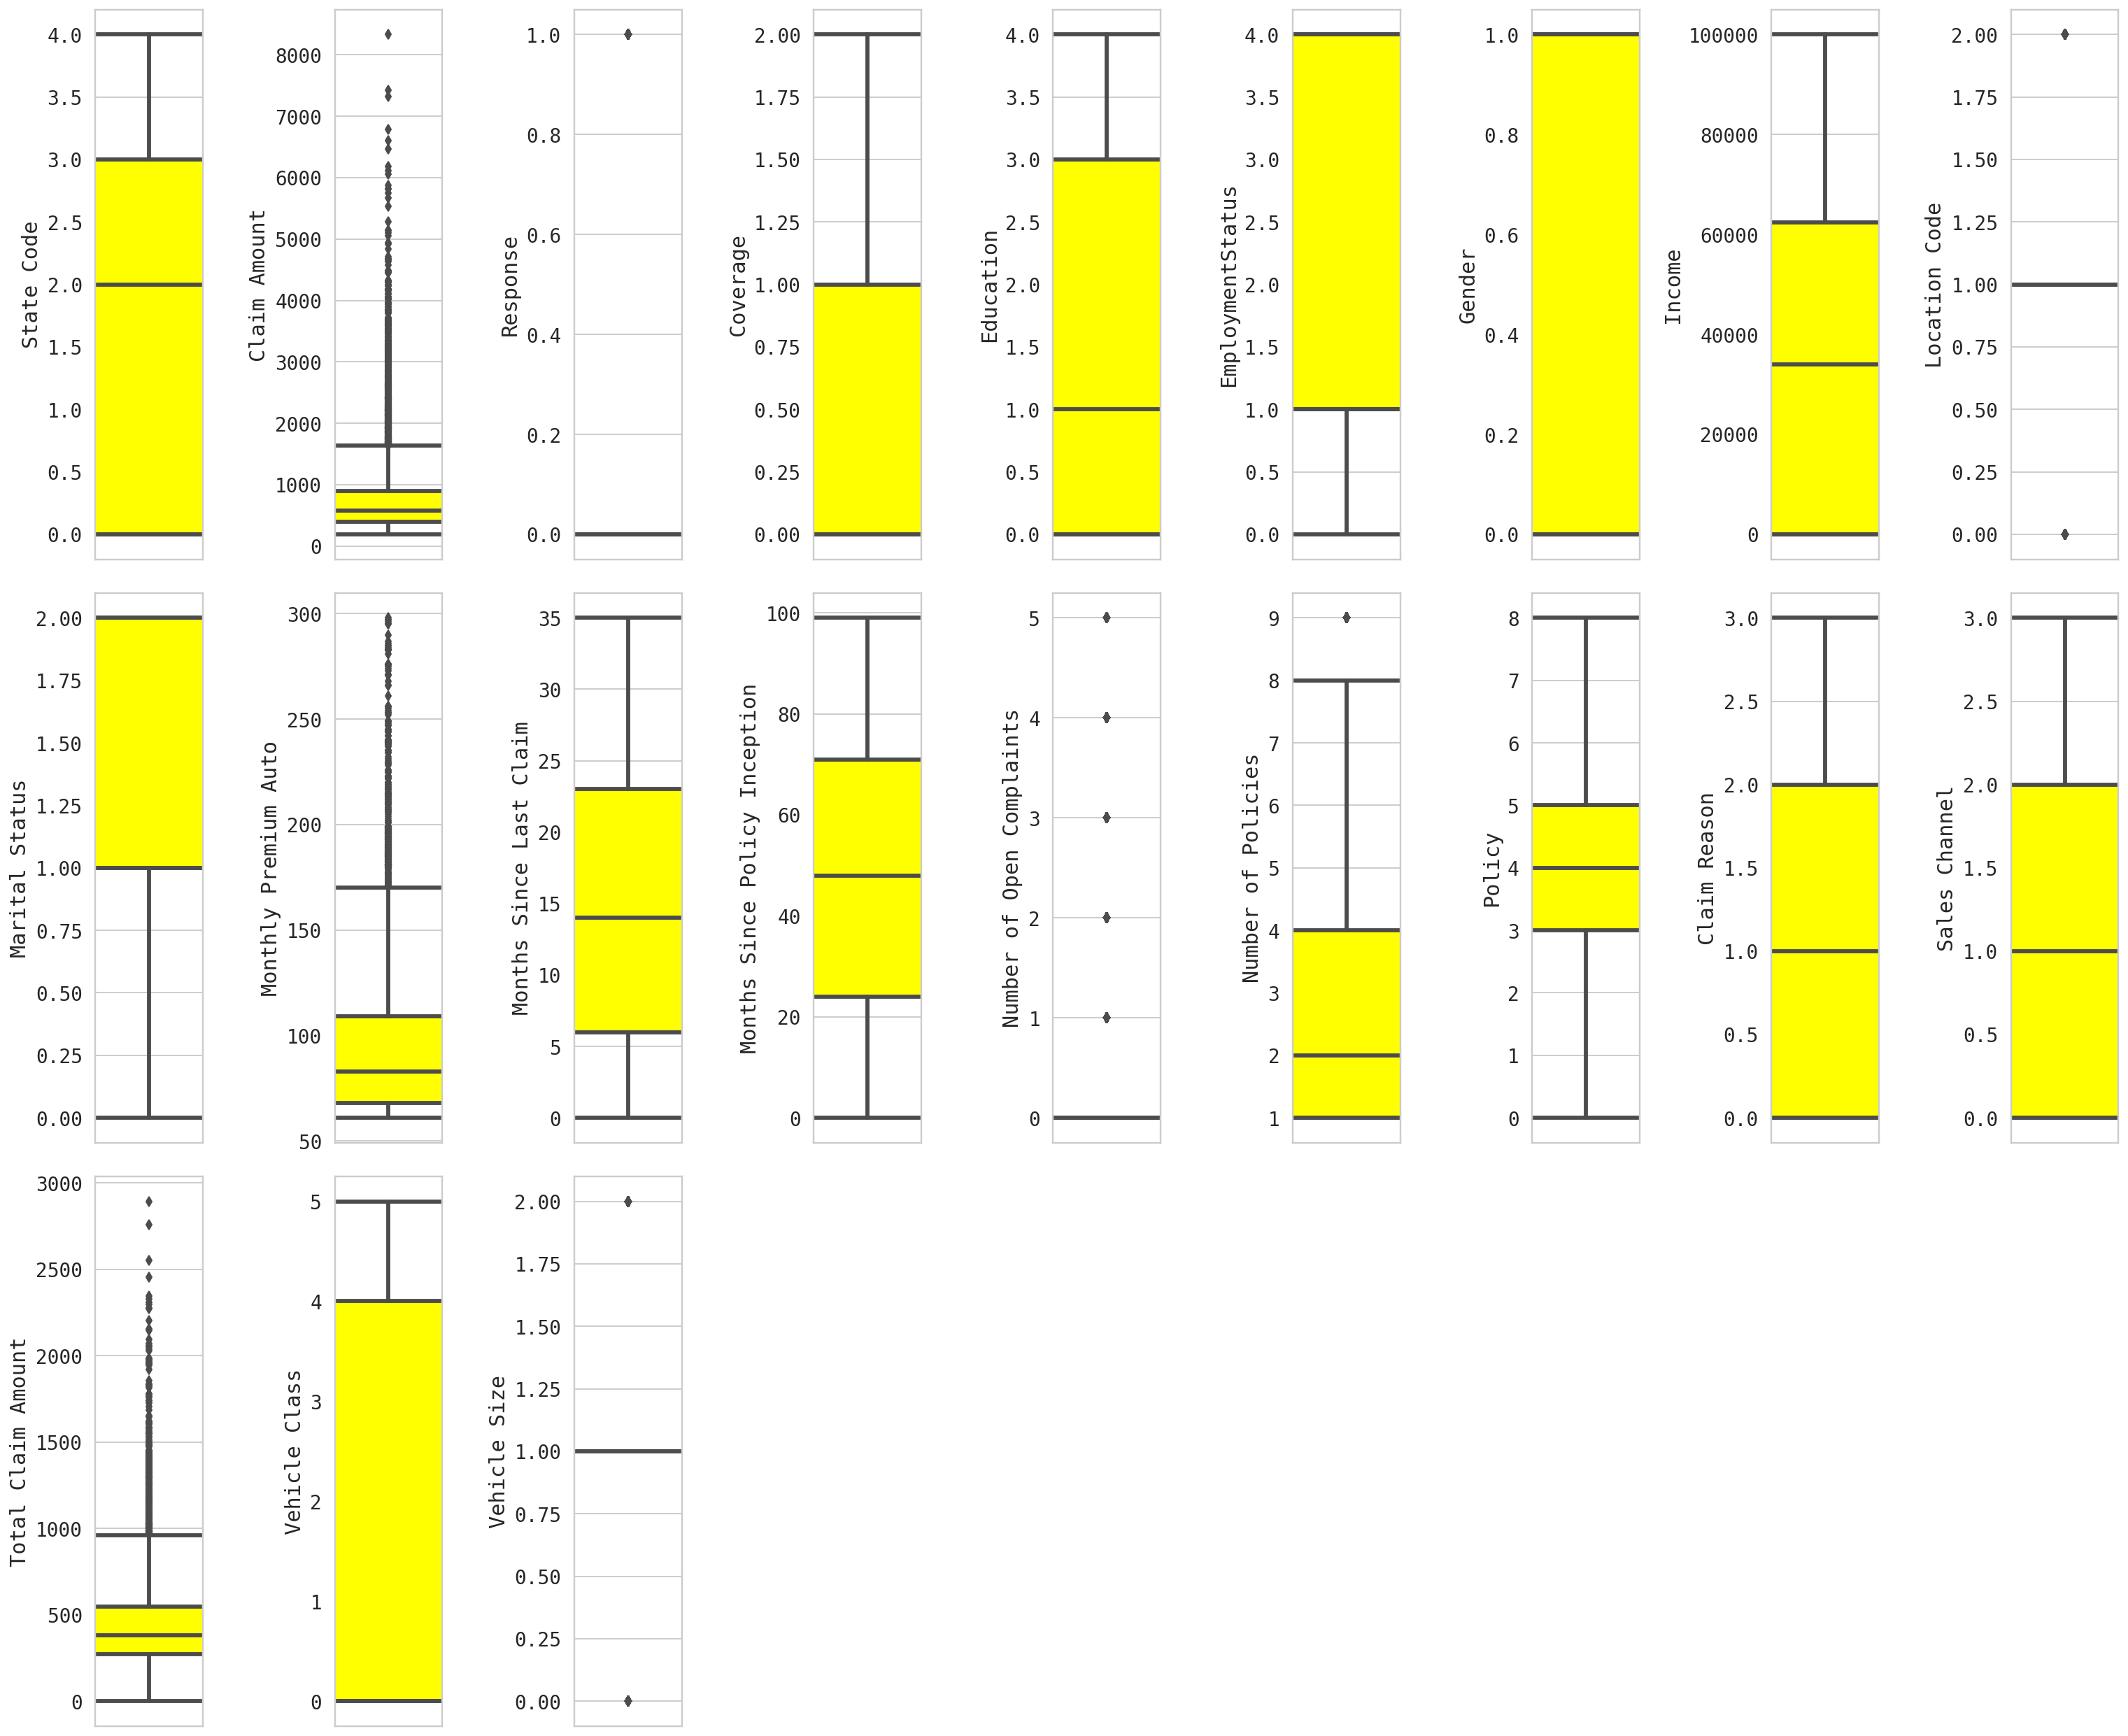

In [49]:
#boxplot to visualize outliers
plt.figure(figsize=(22,18),dpi=140)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,21):
    plt.subplot(3,9,i+1)
    sns.boxplot(cla[cl[i]],orient='v',color='yellow',saturation=15,width=2,linewidth=3)
plt.tight_layout()

In [50]:
#checking outliers
zs=np.abs(zscore(cla))
zs

array([[0.55338752, 0.76310573, 0.38250122, ..., 0.16860988, 1.50073708,
        0.16856955],
       [0.96991393, 0.14920244, 0.38250122, ..., 2.39669759, 0.91209355,
        0.16856955],
       [1.73156465, 0.71105903, 0.38250122, ..., 0.45553023, 1.50073708,
        0.16856955],
       ...,
       [0.20826321, 0.02325399, 0.38250122, ..., 1.22621022, 0.91209355,
        0.16856955],
       [0.20826321, 0.06985742, 0.38250122, ..., 0.88406222, 0.91209355,
        2.03093093],
       [0.20826321, 0.78519253, 0.38250122, ..., 0.22087141, 1.50073708,
        0.16856955]])

In [51]:
print(np.where(zs>3))

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1045, 1045, 1057, 1070, 1077, 1077, 1107, 1111, 1118, 1131,
       1156, 1172, 1177, 1182, 1198, 1210, 1231, 1238, 1281, 1289, 1289,
       1297, 1302, 1309, 1309, 1316, 1327, 1361, 1379, 1380, 1380, 1381,
       1389, 1390, 1405, 1418, 1426, 1433, 1463, 1501, 1503, 1513, 1513,
       1518, 1526, 1531, 1538, 1549, 1549, 1552, 1555, 1589, 1623, 1637,
       1654, 1684, 1792, 1793, 1793, 1806, 1809, 1816, 1816, 1820, 1821,
       1847, 1855, 1855, 1856, 1858, 1878, 1878, 1

In [52]:
#checking few outliers values
print(zs[31][10],'\n',zs[755][10],'\n',zs[8867][10])

4.185673676282611 
 5.175281481203844 
 3.4871269904558573


In [53]:
#removing outliers
insu=cla[(zs<3).all(axis=1)]

In [54]:
print('Shape of the datset before outliers removal=',cla.shape,'\nShape after outliers removal=',insu.shape,
      '\nIntotal',len(cla)-len(insu),'rows with outliers are removed')

Shape of the datset before outliers removal= (8971, 21) 
Shape after outliers removal= (8321, 21) 
Intotal 650 rows with outliers are removed


In [55]:
col=insu.columns.values

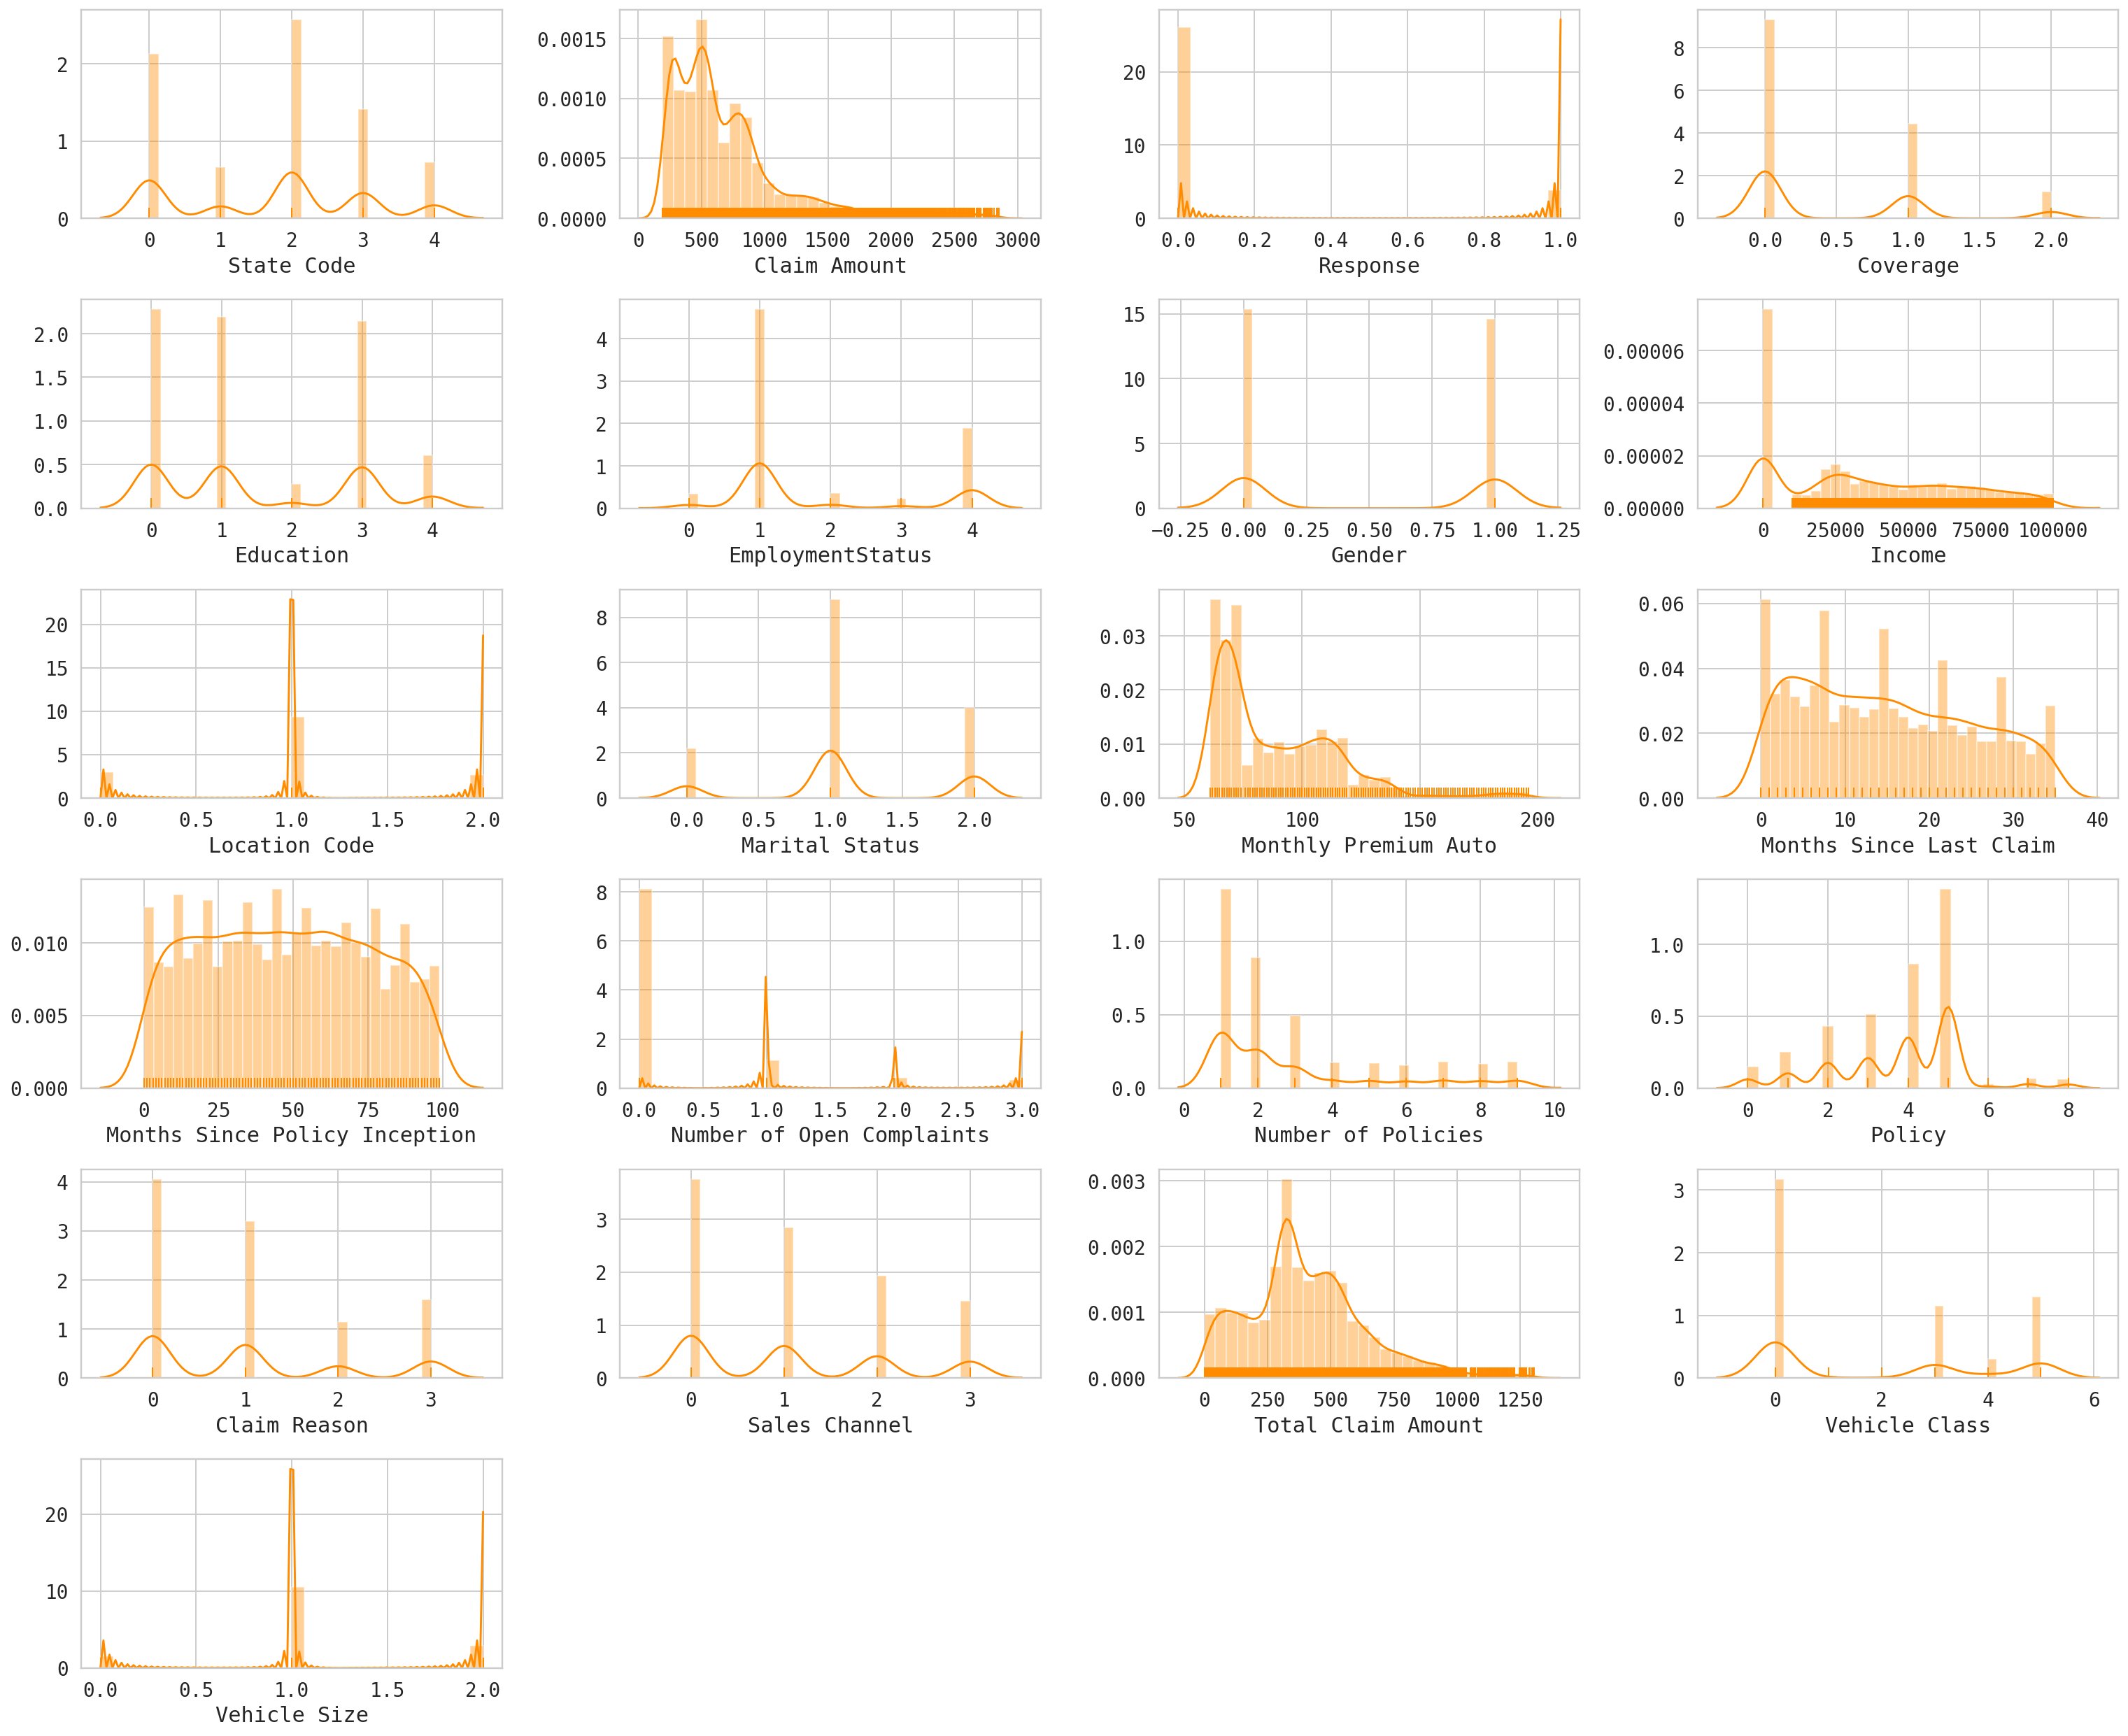

In [56]:
#visualizing the distribution of all attributes
plt.figure(figsize=(22,18),dpi=140)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,21):
    plt.subplot(6,4,i+1)
    sns.distplot(insu[col[i]],color='darkorange',bins=30,kde=True,hist=True,rug=True)
plt.tight_layout()

In [57]:
#checking for skewness
insu.skew()

State Code                       0.017214
Claim Amount                     1.849583
Response                         2.221057
Coverage                         1.079407
Education                        0.339456
EmploymentStatus                 0.844024
Gender                           0.047853
Income                           0.282169
Location Code                    0.012722
Marital Status                  -0.101230
Monthly Premium Auto             1.338226
Months Since Last Claim          0.282706
Months Since Policy Inception    0.049596
Number of Open Complaints        2.559189
Number of Policies               1.223194
Policy                          -0.401834
Claim Reason                     0.712350
Sales Channel                    0.499375
Total Claim Amount               0.706167
Vehicle Class                    0.407603
Vehicle Size                     0.073109
dtype: float64

In [58]:
#removing skew
#a skewness value above +0.55 is termed as positive skew a.k.a right skew/left_tailed skew 
# a skewness value below -0.55 is termed as negative skew a.k.a left skew/right_tailed skew
#here we have only right skew so removing them
for i in insu.columns:
    if insu.skew().loc[i]>0.55:
        insu[i]=np.log1p(insu[i])

In [59]:
#checking corelation
ins_corr=insu.corr()
ins_corr

State Code  Claim Amount  Response  Coverage  \
State Code                       1.000000     -0.011149  0.005002  0.011822   
Claim Amount                    -0.011149      1.000000  0.009961  0.198866   
Response                         0.005002      0.009961  1.000000 -0.007890   
Coverage                         0.011822      0.198866 -0.007890  1.000000   
Education                        0.004816      0.015806  0.004459  0.020443   
EmploymentStatus                 0.000696     -0.051607 -0.003907  0.004337   
Gender                          -0.000862     -0.012863  0.011699 -0.017221   
Income                           0.000533      0.048619  0.012570 -0.015491   
Location Code                    0.001841      0.002348  0.002507 -0.015943   
Marital Status                  -0.006097     -0.039487 -0.073747 -0.002164   
Monthly Premium Auto             0.007211      0.388907  0.008766  0.522432   
Months Since Last Claim          0.008089      0.004374 -0.024735  0.006867   
Months Since Policy Inception   -0.009712     -0.011502 -0.011077  0.004305   
Number of Open Complaints        0.018264     -0.016563 -0.019942 -0.005209   
Number of Policies              -0.009652      0.358268 -0.019882 -0.012349   
Policy                          -0.011260      0.011358 -0.017800 -0.005540   
Claim Reason                     0.007671     -0.093739 -0.122374 -0.035341   
Sales Channel                   -0.000828     -0.022130 -0.080080 -0.021244   
Total Claim Amount               0.009290      0.098236  0.053536  0.160191   
Vehicle Class                   -0.003976      0.095859  0.022893 -0.019802   
Vehicle Size                    -0.000955      0.009238 -0.053653 -0.014758   

                               Education  EmploymentStatus    Gender  \
State Code                      0.004816          0.000696 -0.000862   
Claim Amount                    0.015806         -0.051607 -0.012863   
Response                        0.004459         -0.003907  0.011699   
Coverage                        0.020443          0.004337 -0.017221   
Education                       1.000000         -0.022662  0.001656   
EmploymentStatus               -0.022662          1.000000  0.035051   
Gender                          0.001656          0.035051  1.000000   
Income                          0.014303         -0.655255 -0.009148   
Location Code                  -0.014931          0.012970  0.004798   
Marital Status                  0.001635          0.299163  0.027392   
Monthly Premium Auto            0.024867         -0.007110 -0.006448   
Months Since Last Claim         0.001896          0.008887  0.026289   
Months Since Policy Inception   0.004267          0.014235  0.005257   
Number of Open Complaints      -0.014037          0.013253 -0.006632   
Number of Policies              0.001731          0.008054  0.017743   
Policy                          0.013624          0.001419 -0.003013   
Claim Reason                    0.060221         -0.109053  0.038892   
Sales Channel                  -0.000959         -0.018067 -0.018703   
Total Claim Amount              0.009623          0.264533  0.071321   
Vehicle Class                   0.010310         -0.005671  0.019540   
Vehicle Size                   -0.009015         -0.009868 -0.000329   

                                 Income  Location Code  Marital Status  ...  \
State Code                     0.000533       0.001841       -0.006097  ...   
Claim Amount                   0.048619       0.002348       -0.039487  ...   
Response                       0.012570       0.002507       -0.073747  ...   
Coverage                      -0.015491      -0.015943       -0.002164  ...   
Education                      0.014303      -0.014931        0.001635  ...   
EmploymentStatus              -0.655255       0.012970        0.299163  ...   
Gender                        -0.009148       0.004798        0.027392  ...   
Income                         1.000000      -0.023067       -0.232996  ...

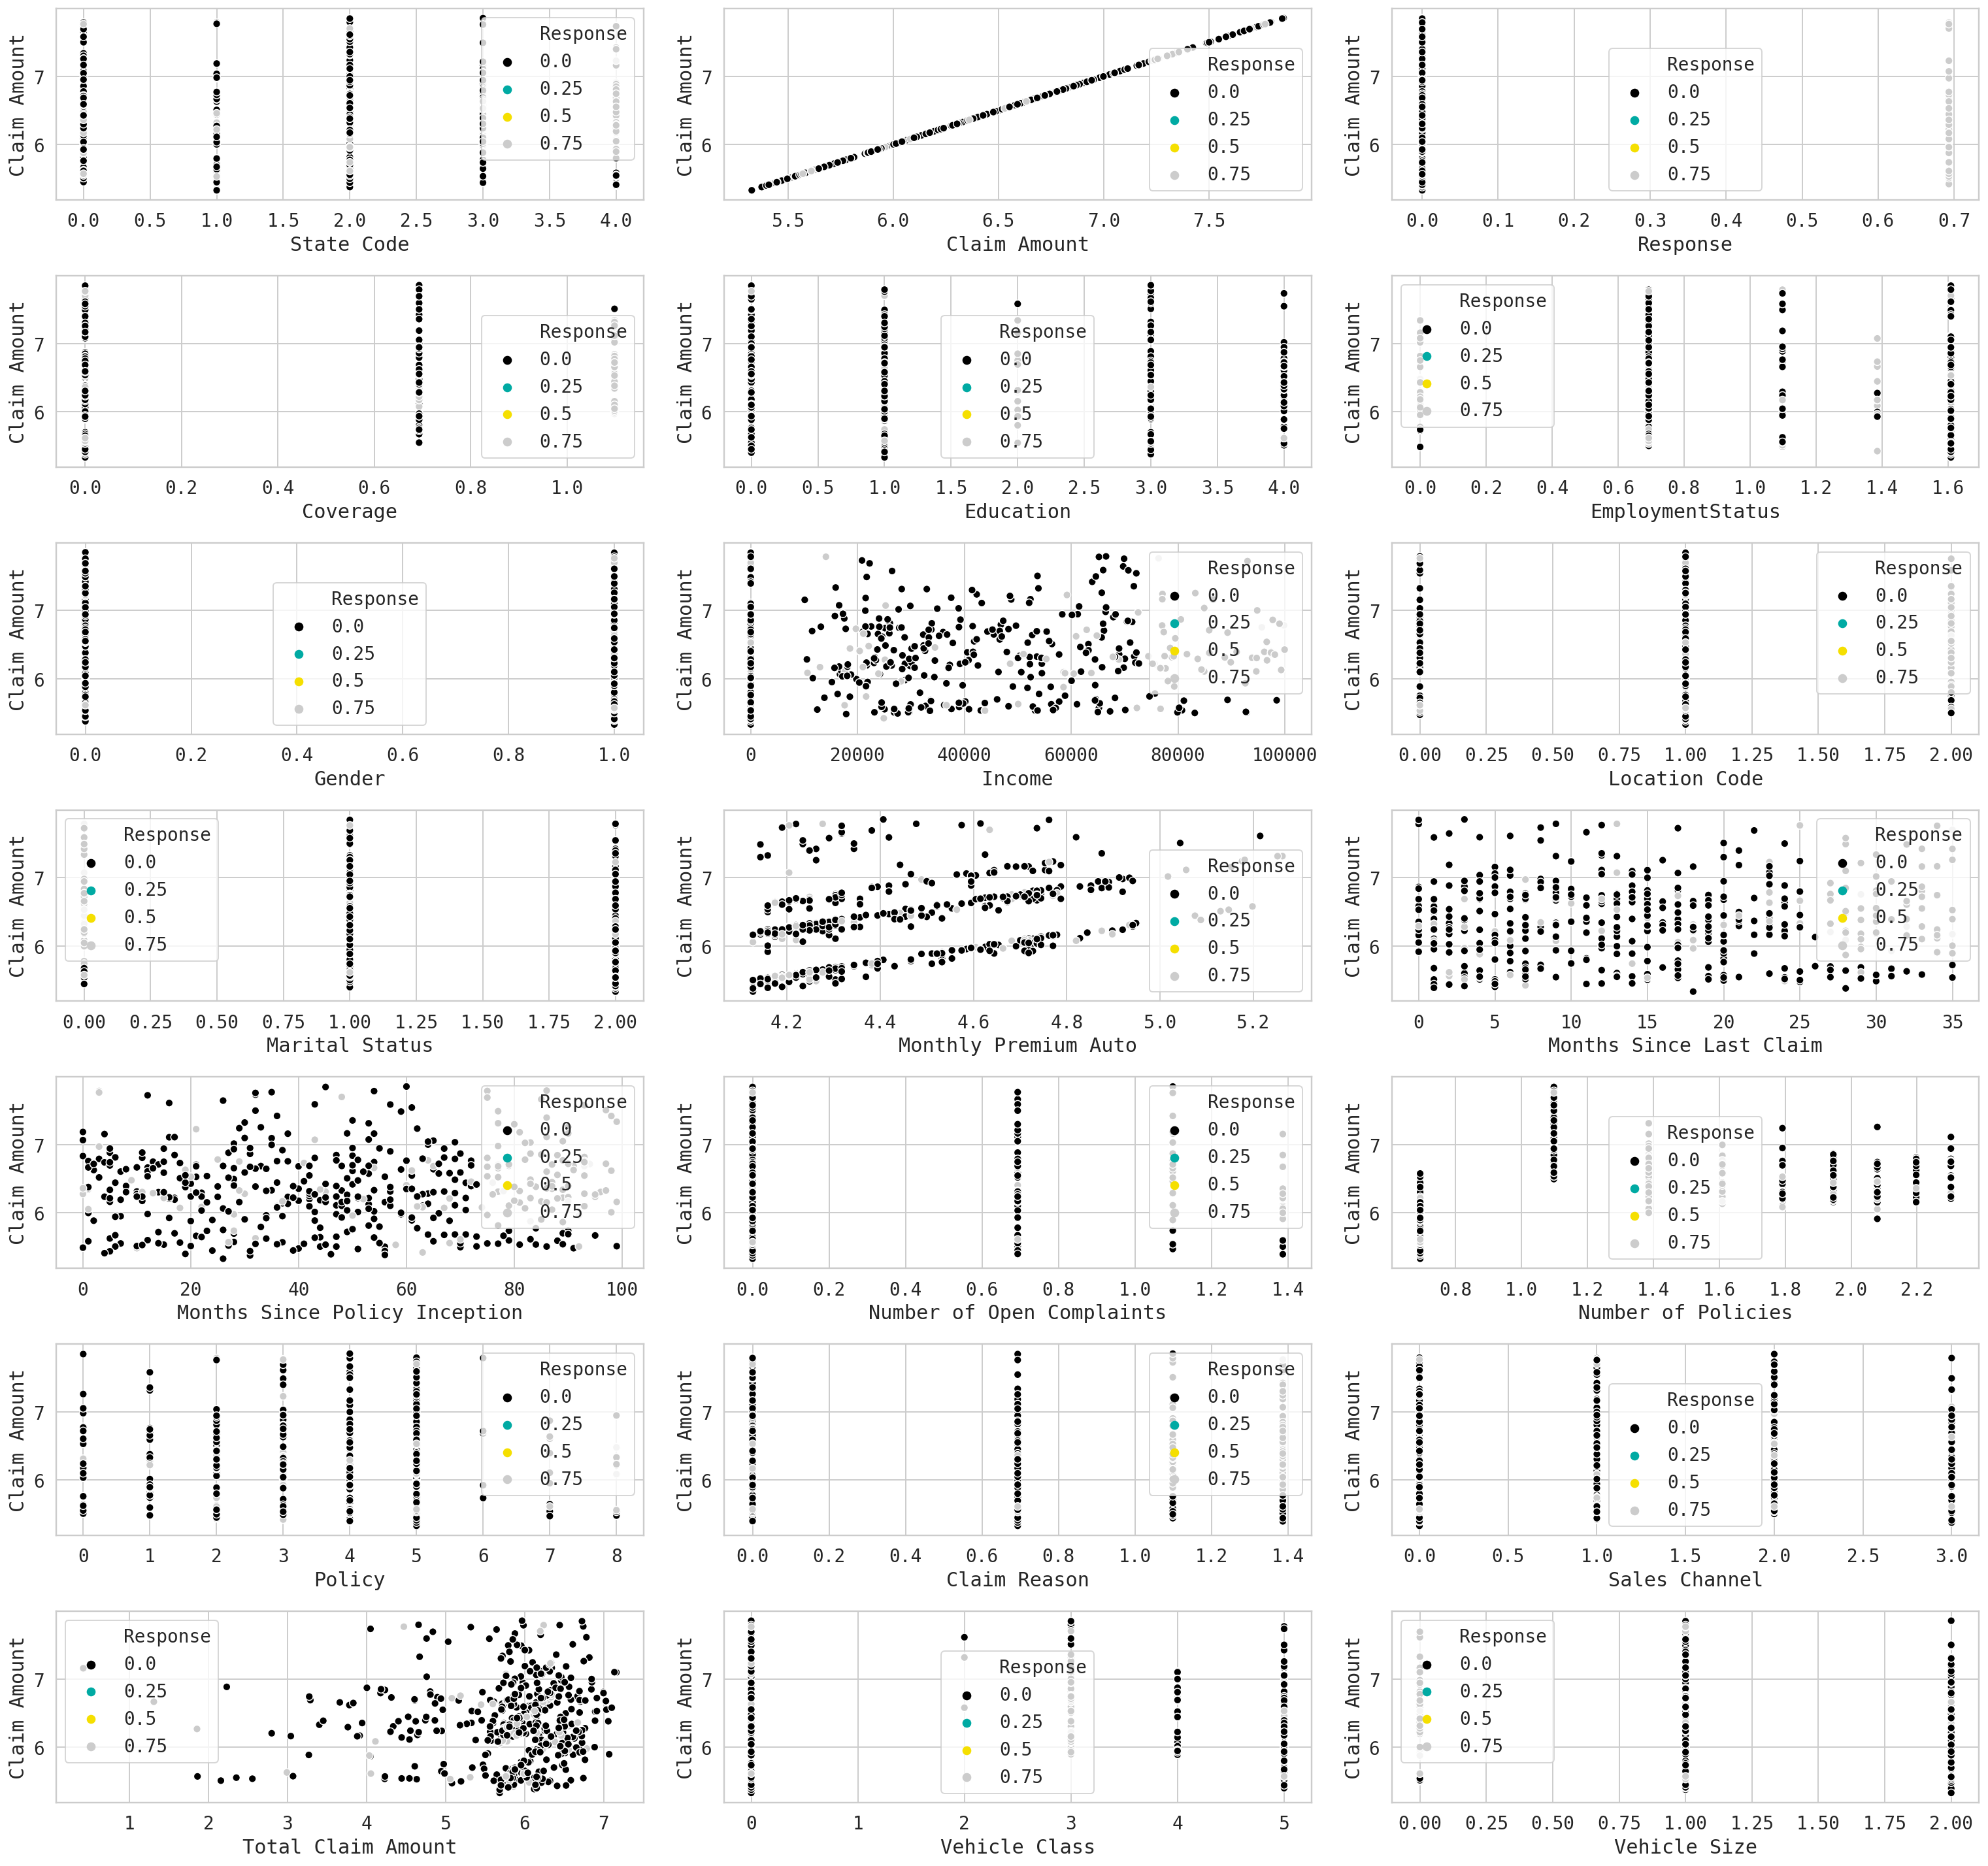

In [60]:
#plotting scatterplot to check the relations between all input variables with output
plt.figure(figsize=(22,23),dpi=140)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,21):
    plt.subplot(8,3,i+1)
    sns.scatterplot(x=(insu[col[i]]).head(500),y=(insu['Claim Amount']).head(500),hue=insu['Response'],
                    palette='nipy_spectral',ci=50,x_bins=40,y_bins=40)
plt.tight_layout()

In [61]:
#importing important librarier for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')



In [62]:
insu.head(3)

State Code  Claim Amount  Response  Coverage  Education  EmploymentStatus  \
0           1      5.625287       0.0  0.000000          0          0.693147   
1           3      6.549584       0.0  0.693147          0          1.609438   
2           4      7.162198       0.0  1.098612          0          0.693147   

   Gender  Income  Location Code  Marital Status  ...  \
0       0   56274              1               1  ...   
1       0       0              1               2  ...   
2       0   48767              1               1  ...   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   

   Number of Open Complaints  Number of Policies  Policy  Claim Reason  \
0                        0.0            0.693147       2      0.000000   
1                        0.0            2.197225       5      1.386294   
2                        0.0            1.098612       5      0.000000   

   Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size  
0              0            5.955348              5             1  
1              0            7.032152              0             1  
2              0            6.341192              5             1  

[3 rows x 21 columns]

In [63]:
x=insu.drop(['Claim Amount'],axis=1)
y=insu['Claim Amount']

In [64]:
x.head(5)

State Code  Response  Coverage  Education  EmploymentStatus  Gender  \
0           1       0.0  0.000000          0          0.693147       0   
1           3       0.0  0.693147          0          1.609438       0   
2           4       0.0  1.098612          0          0.693147       0   
3           2       0.0  0.000000          0          1.609438       1   
4           1       0.0  0.000000          0          0.693147       1   

   Income  Location Code  Marital Status  Monthly Premium Auto  \
0   56274              1               1              4.248495   
1       0              1               2              4.553877   
2   48767              1               1              4.691348   
3       0              1               1              4.672829   
4   43836              0               2              4.304065   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Policy  Claim Reason  \
0                        0.0            0.693147       2      0.000000   
1                        0.0            2.197225       5      1.386294   
2                        0.0            1.098612       5      0.000000   
3                        0.0            2.079442       1      0.000000   
4                        0.0            0.693147       3      0.000000   

   Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size  
0              0            5.955348              5             1  
1              0            7.032152              0             1  
2              0            6.341192              5             1  
3              2            6.274539              3             1  
4              0            4.935415              0             1

In [65]:
y.head()

0    5.625287
1    6.549584
2    7.162198
3    6.640642
4    5.643216
Name: Claim Amount, dtype: float64

In [66]:
#using standard scaler on x to scale the values
ss=StandardScaler()
x=ss.fit_transform(x)
x.shape

(8321, 20)

In [67]:
#converting y interm of np.array and reshaping in form of many rows and one column
y=np.array(y)
y=y.reshape(-1,1)

In [68]:
print('Shape of x=', x.shape,'\nShape of y=',y.shape)

Shape of x= (8321, 20) 
Shape of y= (8321, 1)


Generating a function to achive highest performing parameters for each algo

In [69]:
#creating a function to get the best random state for a model to get optimum performing model
def model(mod,x,y):
    r2=0
    for i in range(27,240):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print('In this model',
          '\n Random State= ',random_state, 
          '\n r2 score = ',r2score,
          '\n mean abs error value (MAE)= ', MAE,
          '\n mean squared error value (MSE)= ',MSE,
          '\n & root mean sq error (RMSE)= ', RMSE )  

LINEAR REGRESSION

In [70]:
lireg=LinearRegression()
m1=model(lireg,x,y)

In this model 
 Random State=  86 
 r2 score =  0.28326472760371735 
 mean abs error value (MAE)=  0.38185591594226925 
 mean squared error value (MSE)=  0.23744174157893705 
 & root mean sq error (RMSE)=  0.4872799416956715


In [71]:
#CHECKING FOR OVER/UNDER FITTING
lireg_scr=cvs(lireg,x,y,cv=30,scoring='r2')
print('the R2 score at liner regression model is=',lireg_scr.mean())

the R2 score at liner regression model is= 0.2828001722309447


LASSO REGRESSION

In [72]:
import warnings
warnings.filterwarnings('ignore')

#checking for best parameters for Lasso using RandomizedSearchCV
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,0.001),'max_iter':(20,40,50,90,150)}
lso_rsv=rsv(lso,lso_para,cv=30,n_iter=20)
lso_rsv.fit(x,y)
print(lso_rsv)
print('\nbest_score=',lso_rsv.best_score_)
print('\nbest_parameters=',lso_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'alpha': (0.01, 0.1, 1.0, 10, 0.001),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.2829326746093528

best_parameters= {'max_iter': 20, 'alpha': 0.001}


In [73]:
lso=Lasso(alpha=0.001,max_iter=50)
m2=model(lso,x,y)

In this model 
 Random State=  86 
 r2 score =  0.2837234570982078 
 mean abs error value (MAE)=  0.38171741030342876 
 mean squared error value (MSE)=  0.2372897725964126 
 & root mean sq error (RMSE)=  0.48712398072401714


In [74]:
#CHECKING FOR OVER/UNDER FITTING
lso_scr=cvs(lso,x,y,cv=30,scoring='r2')
print('the R2 score at LASSO model is=',lso_scr.mean())

the R2 score at LASSO model is= 0.28295011028841205


RIDGE REGRESSION

In [75]:
#checking for best parameters for Ridge using RandomizedSearchCV
rid=Ridge()
rid_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150)}
rid_rsv=rsv(rid,rid_para,cv=30,n_iter=20)
rid_rsv.fit(x,y)
print('best_score=',rid_rsv.best_score_)
print('best_parameters=',rid_rsv.best_params_)

best_score= 0.2827883832063317
best_parameters= {'max_iter': 90, 'alpha': 12}


In [76]:
rid=Ridge(alpha=1.0,max_iter=20)
m3=model(rid,x,y)

In this model 
 Random State=  86 
 r2 score =  0.2832683172377848 
 mean abs error value (MAE)=  0.3818540072271662 
 mean squared error value (MSE)=  0.23744055239654652 
 & root mean sq error (RMSE)=  0.4872787214690854


In [77]:
#CHECKING FOR OVER/UNDER FITTING
rid_scr=cvs(rid,x,y,cv=40,scoring='r2')
print('the R2 score at  RIDGE model is=',rid_scr.mean())

the R2 score at  RIDGE model is= 0.28192423005318534


ELASTIC NET

In [78]:
#checking for best parameters for Ridge using RandomizedSearchCV
els=ElasticNet()
els_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150)}
els_rsv=rsv(els,els_para,cv=30,n_iter=20)
els_rsv.fit(x,y)
print(els_rsv)
print('best_score=',els_rsv.best_score_)
print('best_parameters=',els_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
best_score= 0.2831025544020485
best_parameters= {'max_iter': 20, 'alpha': 0.01}


In [79]:
els=ElasticNet(max_iter=40,alpha=0.001)
m4=model(els,x,y)

In this model 
 Random State=  86 
 r2 score =  0.28352813880742544 
 mean abs error value (MAE)=  0.38177365411219844 
 mean squared error value (MSE)=  0.23735447809774862 
 & root mean sq error (RMSE)=  0.4871903920417034


In [80]:
#CHECKING FOR OVER/UNDER FITTING
els_scr=cvs(els,x,y,cv=40,scoring='r2')
print('the R2 score at ELASTIC NET model is=',els_scr.mean())

the R2 score at ELASTIC NET model is= 0.2820026309953041


DECISION TREE REGRESSOR

In [81]:
#check for best parameters using RandomizedSearchCV
dtr=DecisionTreeRegressor()
dpara={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':(3,5,8),
    'min_samples_split':(5,9)}
dtr_rsv=rsv(dtr,dpara,cv=80,n_iter=40)
dtr_rsv.fit(x,y)
print(dtr_rsv)
print(dtr_rsv.best_score_)
print(dtr_rsv.best_params_)

RandomizedSearchCV(cv=80, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=40, n_jobs=None,
                   param_d

In [82]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=8,min_samples_split=9,splitter='random')
m5=model(dtr,x,y)

In this model 
 Random State=  86 
 r2 score =  0.9060656996733722 
 mean abs error value (MAE)=  0.09324288353811078 
 mean squared error value (MSE)=  0.03111877526130957 
 & root mean sq error (RMSE)=  0.17640514522345874


In [83]:
#CHECKING FOR OVER/UNDER FITTING
dtr_scr=cvs(dtr,x,y,cv=45,scoring='r2')
print('the R2 score at  DTR model is=',dtr_scr.mean())

the R2 score at  DTR model is= 0.886323876664654


SUPPORT VECTOR REGRESSOR

In [84]:
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.001,0.01)}
svr_rsv=rsv(svr,svr_para,cv=20,n_iter=40,)
svr_rsv.fit(x,y)
svr_rsv.best_score_
svr_rsv.best_params_

{'kernel': 'rbf', 'gamma': 0.01}

In [86]:
svr=SVR(kernel='rbf',gamma=0.01,C=8)
m6=model(svr,x,y)

In this model 
 Random State=  86 
 r2 score =  0.5489273004285309 
 mean abs error value (MAE)=  0.2429848671047787 
 mean squared error value (MSE)=  0.14943242155067932 
 & root mean sq error (RMSE)=  0.38656489953263906


In [87]:
svr_scr=cvs(svr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',svr_scr.mean())

the R2 score at SVR model is= 0.5585568275831149


K_NEIGHBORS REGRESSOR

In [88]:
knr=KNeighborsRegressor()
kp={'n_neighbors':range(2,18),'algorithm':('auto','ball_tree','kd_tree','brute'),'leaf_size':range(4,12)}
k_rsv=rsv(knr,kp,cv=40,n_iter=30)
k_rsv.fit(x,y)
k_rsv.best_params_

{'n_neighbors': 14, 'leaf_size': 8, 'algorithm': 'ball_tree'}

In [89]:
knr=KNeighborsRegressor(n_neighbors=14,leaf_size=8,algorithm='ball_tree')
m7=model(knr,x,y)

In this model 
 Random State=  92 
 r2 score =  0.26376199866086414 
 mean abs error value (MAE)=  0.37467929331215377 
 mean squared error value (MSE)=  0.24390265135145436 
 & root mean sq error (RMSE)=  0.49386501328951654


In [90]:
#CHECKING FOR OVER/UNDER FITTING
knr_scr=cvs(knr,x,y,cv=40,scoring='r2')
print('the R2 score at KNR model is=',knr_scr.mean())

the R2 score at KNR model is= 0.2939842815997049


RANDOM FOREST REGRESSOR

In [91]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[130,250],'max_features':range(2,8),'min_samples_leaf':range(3,6),'max_depth':[3,8,13]}
rfr_rsv=rsv(rfr,rfr_para,cv=40,n_iter=30)
rfr_rsv.fit(x,y)
rfr_rsv.best_score_
rfr_rsv.best_params_

{'n_estimators': 130,
 'min_samples_leaf': 4,
 'max_features': 7,
 'max_depth': 13}

In [92]:
rfr=RandomForestRegressor(n_estimators=130,max_features=7,min_samples_leaf=4,max_depth=13)
m8=model(rfr,x,y)

In this model 
 Random State=  127 
 r2 score =  0.9132342292877333 
 mean abs error value (MAE)=  0.08467637473928516 
 mean squared error value (MSE)=  0.028743967962509574 
 & root mean sq error (RMSE)=  0.16954046113689078


In [93]:
rfr_scr=cvs(rfr,x,y,cv=40,scoring='r2')
print('the R2 score at RFR model is=',rfr_scr.mean())

the R2 score at RFR model is= 0.9183422387200032


PUTTING ALL THE VALUES SO OBATAINED IN A SINGLE DATAFRAME FOR BATTER VISUALIZATION

In [95]:
infy=[['LINEAR_REG',86,0.28326,0.28280],
      ['LASSO',86,0.28372,0.28295],
      ['RIDGE',86,0.28326,0.28192],
      ['ELASTIC NET',86,0.28352,0.28200],
      ['DTR',86,0.906065,0.886323],
      ['SVR',86, 0.54892,0.55855],
      ['KNR',92,0.26376,0.29398],
      ['RFR',127,0.91442,0.91813]]


board=pd.DataFrame(infy,columns=['MOD_NAME','RAND_STATE','R2_SCORE W/O CV','R2_SCORE WITH CV'])
board.style.set_properties(**{'background-color': 'indigo',
                           'color': 'gold',
                           'border-color': 'plum'})

In [96]:
#the model performance  are not upto the mark so using adaboost by taking 'decision tree regressor'as basemodel

from sklearn.ensemble import AdaBoostRegressor  #calling boosting algo


x_train,x_test,y_train,y_test = tts(x,y,test_size=0.33,random_state=38)
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=8,min_samples_split=9,splitter='random')
para={'learning_rate':(0.1,0.01,0.001)}
abr=AdaBoostRegressor(base_estimator=dtr)
abr_rsv=rsv(abr,para,cv=40,n_iter=30)
abr_rsv.fit(x_train,y_train)
print(abr_rsv)
print("best parameters:", abr_rsv.best_params_)
print("\n best score:",abr_rsv.best_score_)

RandomizedSearchCV(cv=40, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                                    max_depth=8,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=9,
                                                                                    min_weight_fr

In [97]:
abr=AdaBoostRegressor(base_estimator=dtr,learning_rate=0.001)
m9=model(abr,x,y)

In this model 
 Random State=  127 
 r2 score =  0.9116393344152748 
 mean abs error value (MAE)=  0.08610858588590213 
 mean squared error value (MSE)=  0.02927232847543057 
 & root mean sq error (RMSE)=  0.17109157920666512


So from the above tabulation it is clear that "AdaBoostRegressor" is giving the highest r2 score  and basing on that performance selecting "AdaBoostRegressor" as the final model and saving it.

In [99]:
import joblib
joblib.dump(abr,'INSU_CLM_ABR.pkl')

['INSU_CLM_ABR.pkl']